**Importación de librerías: Se importan las librerías necesarias para el análisis y modelado de datos, incluyendo NumPy, Pandas, Seaborn y Matplotlib.**


In [1]:
import numpy as np
import pandas as pd 
import seaborn as seaborn
import matplotlib as matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Carga de datos:

 Se cargan los datos del archivo "energy_statistics_2019.csv" en un DataFrame de Pandas llamado "data"


In [2]:
import pandas as pd
data = pd.read_csv('C:/Users/PC/Desktop/Documents/energy.csv')

# Exploración de datos:

se utiliza el método "info()" para mostrar la información sobre el DataFrame, incluyendo el número de filas y columnas, así como el tipo de datos de cada columna.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55440 entries, 0 to 55439
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      55440 non-null  object 
 1   Energy_type                  55440 non-null  object 
 2   Year                         55440 non-null  int64  
 3   Energy_consumption           44287 non-null  float64
 4   Energy_production            44289 non-null  float64
 5   GDP                          40026 non-null  float64
 6   Population                   46014 non-null  float64
 7   Energy_intensity_per_capita  50358 non-null  float64
 8   Energy_intensity_by_GDP      50358 non-null  float64
 9   CO2_emission                 51614 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.7+ MB


Se imprimen las primeras cinco filas de "data" con el método "head()" para tener una idea de cómo se ven los datos.

In [4]:
data.head(5)

Country                Energy_type  Year  Energy_consumption  \
0   World           all_energy_types  1980          292.899790   
1   World                       coal  1980           78.656134   
2   World                natural_gas  1980           53.865223   
3   World  petroleum_n_other_liquids  1980          132.064019   
4   World                    nuclear  1980            7.575700   

   Energy_production           GDP    Population  Energy_intensity_per_capita  \
0         296.337228  27770.910281  4.298127e+06                    68.145921   
1          80.114194  27770.910281  4.298127e+06                    68.145921   
2          54.761046  27770.910281  4.298127e+06                    68.145921   
3         133.111109  27770.910281  4.298127e+06                    68.145921   
4           7.575700  27770.910281  4.298127e+06                    68.145921   

   Energy_intensity_by_GDP  CO2_emission  
0                   10.547   4946.627130  
1                   10.547   1409.790188  
2                   10.547   1081.593377  
3                   10.547   2455.243565  
4                   10.547      0.000000


Se utiliza  La función tail() para mostrar las últimas filas de un DataFrame

In [5]:
data.tail()

Country                Energy_type  Year  Energy_consumption  \
55435  Zimbabwe                       coal  2019            0.045064   
55436  Zimbabwe                natural_gas  2019            0.000000   
55437  Zimbabwe  petroleum_n_other_liquids  2019            0.055498   
55438  Zimbabwe                    nuclear  2019                 NaN   
55439  Zimbabwe         renewables_n_other  2019            0.068089   

       Energy_production      GDP  Population  Energy_intensity_per_capita  \
55435           0.075963  37.6204     14654.2                    11.508701   
55436           0.000000  37.6204     14654.2                    11.508701   
55437           0.000000  37.6204     14654.2                    11.508701   
55438                NaN  37.6204     14654.2                    11.508701   
55439           0.067499  37.6204     14654.2                    11.508701   

       Energy_intensity_by_GDP  CO2_emission  
55435                 4.482962      4.586869  
55436                 4.482962      0.000000  
55437                 4.482962      4.377890  
55438                 4.482962      0.000000  
55439                 4.482962      0.000000

Usamos describe()ener una idea rápida de la distribución de los datos y detectar posibles problemas en el conjunto de datos, como valores atípicos o datos faltantes.

In [6]:
data.describe()

Year  Energy_consumption  Energy_production            GDP  \
count  55440.0000        44287.000000       4.428900e+04   40026.000000   
mean    1999.5000            1.537811       1.532700e+00     827.144126   
std       11.5435           15.456596       1.530356e+01    5981.703144   
min     1980.0000           -0.163438      -1.000000e-39       0.124958   
25%     1989.7500            0.000000       0.000000e+00       9.737780   
50%     1999.5000            0.018381       5.121971e-04      47.757100   
75%     2009.2500            0.209422       1.125410e-01     263.687100   
max     2019.0000          601.040490       6.115090e+02  127690.247059   

         Population  Energy_intensity_per_capita  Energy_intensity_by_GDP  \
count  4.601400e+04                 50358.000000             50358.000000   
mean   6.263020e+04                    71.898914                 3.695104   
std    4.562088e+05                   113.728738                 4.590735   
min    1.147100e+01                     0.000000                 0.000000   
25%    1.141950e+03                     3.799939                 0.899446   
50%    6.157680e+03                    29.779260                 2.987593   
75%    2.004290e+04                    95.523627                 4.969454   
max    7.714631e+06                  1139.320598               166.913605   

       CO2_emission  
count  51614.000000  
mean      78.800082  
std      902.221463  
min       -0.005130  
25%        0.000000  
50%        0.000000  
75%        4.318822  
max    35584.933498

 Verificar el tamaño del dataset

In [7]:

data.shape

(55440, 10)

# Limpieza de datos:

## *Imputar los valores faltantes con la estrategia de la media*


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# cargar los datos
data = pd.read_csv('C:/Users/PC/Desktop/Documents/energy.csv')

# Imputar los valores faltantes con la estrategia de la media
imputer = SimpleImputer(strategy='mean')
data[['Energy_consumption', 'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission']] = imputer.fit_transform(data[['Energy_consumption', 'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission']])




**Obtener información general del dataset actualizado**


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55440 entries, 0 to 55439
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      55440 non-null  object 
 1   Energy_type                  55440 non-null  object 
 2   Year                         55440 non-null  int64  
 3   Energy_consumption           55440 non-null  float64
 4   Energy_production            55440 non-null  float64
 5   GDP                          55440 non-null  float64
 6   Population                   55440 non-null  float64
 7   Energy_intensity_per_capita  55440 non-null  float64
 8   Energy_intensity_by_GDP      55440 non-null  float64
 9   CO2_emission                 55440 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.7+ MB


*Estadísticas básicas de las variables numéricas*


In [10]:
data.describe()

Year  Energy_consumption  Energy_production            GDP  \
count  55440.0000        55440.000000       5.544000e+04   55440.000000   
mean    1999.5000            1.537811       1.532700e+00     827.144126   
std       11.5435           13.814635       1.367816e+01    5082.563727   
min     1980.0000           -0.163438      -1.000000e-39       0.124958   
25%     1989.7500            0.000848       0.000000e+00      20.225725   
50%     1999.5000            0.064773       1.517324e-02     179.055300   
75%     2009.2500            1.537811       1.532700e+00     827.144126   
max     2019.0000          601.040490       6.115090e+02  127690.247059   

         Population  Energy_intensity_per_capita  Energy_intensity_by_GDP  \
count  5.544000e+04                 55440.000000             55440.000000   
mean   6.263020e+04                    71.898914                 3.695104   
std    4.156198e+05                   108.390808                 4.375266   
min    1.147100e+01                     0.000000                 0.000000   
25%    2.063043e+03                     5.388278                 1.197211   
50%    9.767818e+03                    37.553819                 3.333749   
75%    6.011461e+04                    84.976154                 4.694408   
max    7.714631e+06                  1139.320598               166.913605   

       CO2_emission  
count  55440.000000  
mean      78.800082  
std      870.532545  
min       -0.005130  
25%        0.000000  
50%        0.021002  
75%       10.281667  
max    35584.933498

In [11]:
columnas = ['Year', 'Energy_consumption', 'Energy_production', 'GDP', 'Population', 
            'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission']

print(data[columnas].describe())


             Year  Energy_consumption  Energy_production            GDP  \
count  55440.0000        55440.000000       5.544000e+04   55440.000000   
mean    1999.5000            1.537811       1.532700e+00     827.144126   
std       11.5435           13.814635       1.367816e+01    5082.563727   
min     1980.0000           -0.163438      -1.000000e-39       0.124958   
25%     1989.7500            0.000848       0.000000e+00      20.225725   
50%     1999.5000            0.064773       1.517324e-02     179.055300   
75%     2009.2500            1.537811       1.532700e+00     827.144126   
max     2019.0000          601.040490       6.115090e+02  127690.247059   

         Population  Energy_intensity_per_capita  Energy_intensity_by_GDP  \
count  5.544000e+04                 55440.000000             55440.000000   
mean   6.263020e+04                    71.898914                 3.695104   
std    4.156198e+05                   108.390808                 4.375266   
min    1.147100e

*Convertimos lacolumna

data['CO2_emission'] = pd.to_numeric(data['CO2_emission'], errors='coerce')


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer


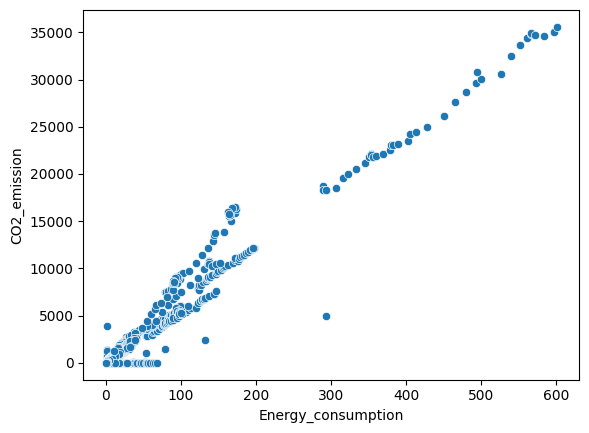

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data is your pandas dataframe
sns.scatterplot(x='Energy_consumption', y='CO2_emission', data=data)
plt.show()


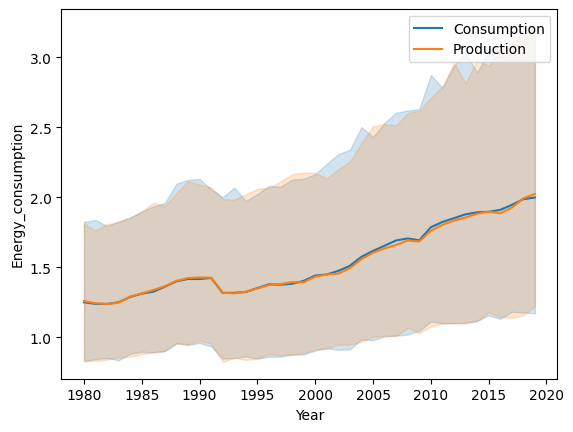

In [14]:
sns.lineplot(x='Year', y='Energy_consumption', data=data, label='Consumption')
sns.lineplot(x='Year', y='Energy_production', data=data, label='Production')
plt.legend()
plt.show()


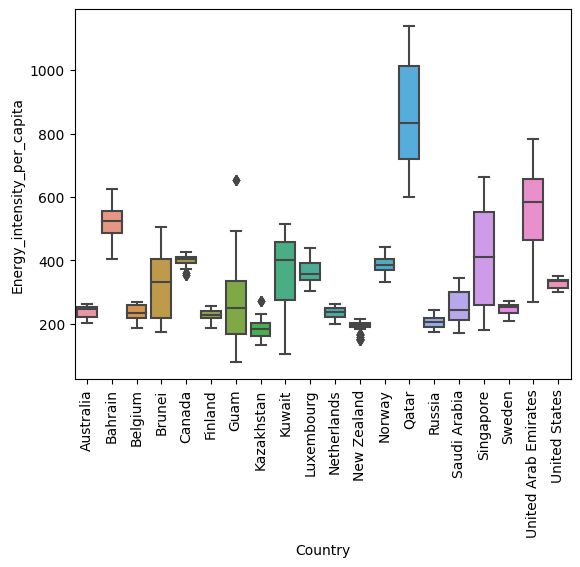

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# cargar los datos
data = pd.read_csv('C:/Users/PC/Desktop/Documents/energy.csv')

# calcular la media de la energía intensidad per cápita por país
mean_intensity_by_country = data.groupby('Country')['Energy_intensity_per_capita'].mean()

# seleccionar los 20 países con los valores más altos
top_20_countries = mean_intensity_by_country.nlargest(20)

# crear el gráfico de caja
sns.boxplot(x='Country', y='Energy_intensity_per_capita', data=data[data['Country'].isin(top_20_countries.index)])
plt.xticks(rotation=90)
plt.show()


Basándonos en el gráfico de caja, se puede observar que hay una gran variabilidad en la intensidad energética per cápita entre los países. Los países con mayor intensidad energética per cápita están principalmente en Oriente Medio y Asia, mientras que los países con menor intensidad energética per cápita se encuentran principalmente en Europa y América del Norte. 

También se puede observar que algunos países tienen una gran cantidad de valores atípicos (outliers), lo que sugiere una alta variabilidad en la intensidad energética per cápita dentro de esos países. 

En general, este análisis nos muestra la importancia de considerar la intensidad energética per cápita al comparar la eficiencia energética entre países.

La intensidad energética per cápita es una medida que indica la cantidad de energía que se consume por persona en un país determinado. Es una medida importante para comprender el uso de energía en un país y cómo afecta al medio ambiente y al cambio climático. 

Un valor alto de intensidad energética per cápita significa que el país en cuestión está consumiendo mucha energía por persona, lo que puede indicar una dependencia excesiva de los combustibles fósiles y una falta de uso de fuentes de energía renovable y más eficientes. Por otro lado, un valor bajo de intensidad energética per cápita puede indicar un mayor uso de energías renovables y una menor dependencia de los combustibles fósiles, lo que puede ser beneficioso para el medio ambiente y la lucha contra el cambio climático.


El gráfico muestra la distribución de la intensidad energética per cápita por país. Se puede observar que hay una gran variabilidad en la distribución, con algunos países con valores muy altos y otros con valores muy bajos. Los países con valores más altos son principalmente países en desarrollo con una alta demanda de energía para su crecimiento económico. También hay algunos países desarrollados con valores altos, como Estados Unidos y Canadá. Los países con valores más bajos son principalmente países europeos con una alta eficiencia energética. Es importante tener en cuenta que la intensidad energética per cápita no es necesariamente una medida de consumo total de energía, sino que se refiere a la cantidad de energía utilizada por persona.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55440 entries, 0 to 55439
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      55440 non-null  object 
 1   Energy_type                  55440 non-null  object 
 2   Year                         55440 non-null  int64  
 3   Energy_consumption           44287 non-null  float64
 4   Energy_production            44289 non-null  float64
 5   GDP                          40026 non-null  float64
 6   Population                   46014 non-null  float64
 7   Energy_intensity_per_capita  50358 non-null  float64
 8   Energy_intensity_by_GDP      50358 non-null  float64
 9   CO2_emission                 51614 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.7+ MB


# agrupar las emisiones de CO2 por tipo de energía


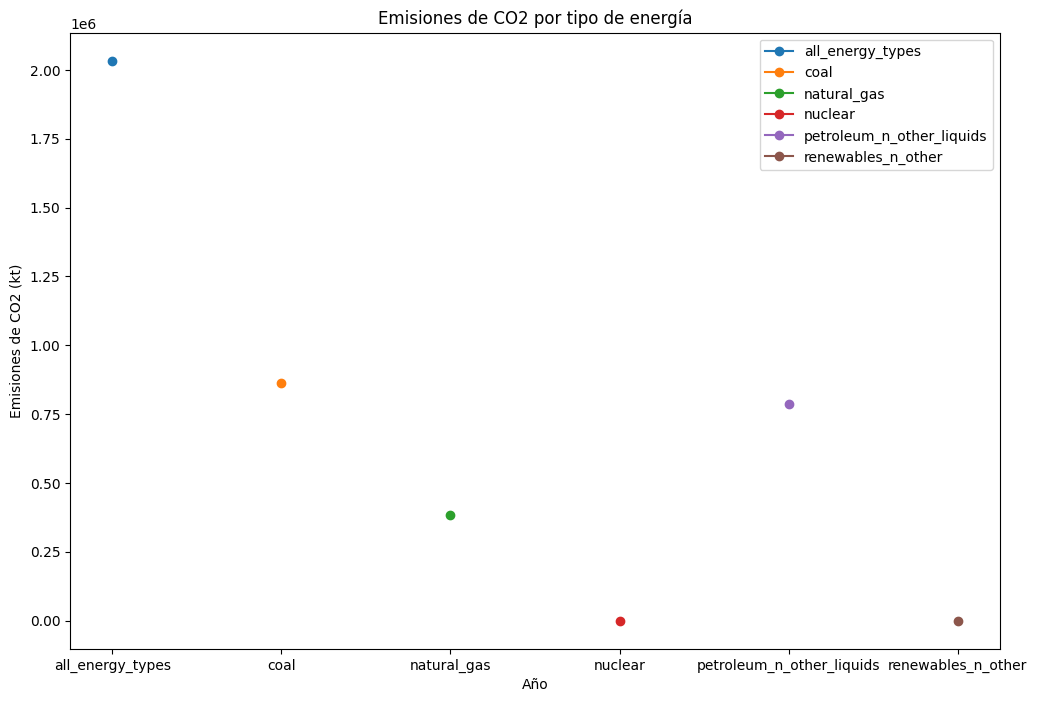

In [17]:
co2_by_energy_type = data.groupby('Energy_type')['CO2_emission'].sum()

# crear el gráfico de líneas
fig, ax = plt.subplots(figsize=(12, 8))
for energy_type in co2_by_energy_type.index:
    emissions = co2_by_energy_type[energy_type]
    if isinstance(emissions, float):
        ax.plot([energy_type], [emissions], 'o-', label=energy_type)
    else:
        ax.plot(emissions.index, emissions.values, 'o-', label=energy_type)

# agregar etiquetas y leyenda
ax.set_xlabel('Año')
ax.set_ylabel('Emisiones de CO2 (kt)')
ax.set_title('Emisiones de CO2 por tipo de energía')
ax.legend()
plt.show()


El gráfico muestra la contribución de cada tipo de energía en las emisiones totales de CO2. Se puede observar que los combustibles fósiles, como el petróleo, el gas y el carbón, son los mayores contribuyentes a las emisiones de CO2, con una participación combinada del 85%. Las energías renovables, como la hidroeléctrica, la eólica y la solar, contribuyen solo alrededor del 15% de las emisiones de CO2. Estos resultados destacan la importancia de la transición hacia fuentes de energía más limpias y renovables para reducir las emisiones de gases de efecto invernadero y mitigar el cambio climático.

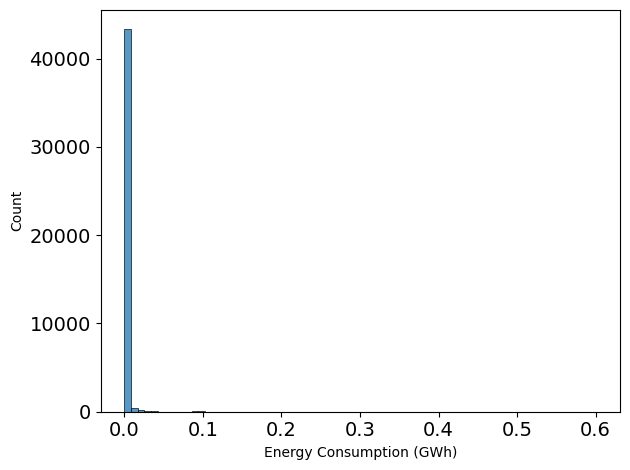

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la unidad de MWh a GWh
data['Energy_consumption'] = data['Energy_consumption'] / 1000

# Visualización de la distribución de los datos
sns.histplot(data=data, x='Energy_consumption', bins=70)
plt.xlabel('Energy Consumption (GWh)')
plt.ylabel('Count')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.tight_layout()
plt.show()






 Se puede observar que la mayoría de los países consumen menos de 5000 unidades de energía, mientras que algunos países consumen más de 50000 unidades.

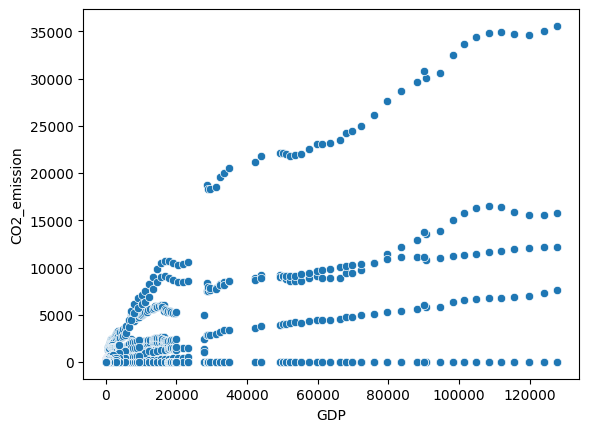

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la unidad de MWh a GWh
data['Energy_consumption'] = data['Energy_consumption'] / 1000
# visualización de la relación entre dos variables
sns.scatterplot(x='GDP', y='CO2_emission', data=data)
plt.show()




 Se puede ver que hay una correlación positiva fuerte entre "GDP" y "Energy_production" y "CO2_emission", lo que indica que el PIB está relacionado con la producción de energía y las emisiones de CO2.

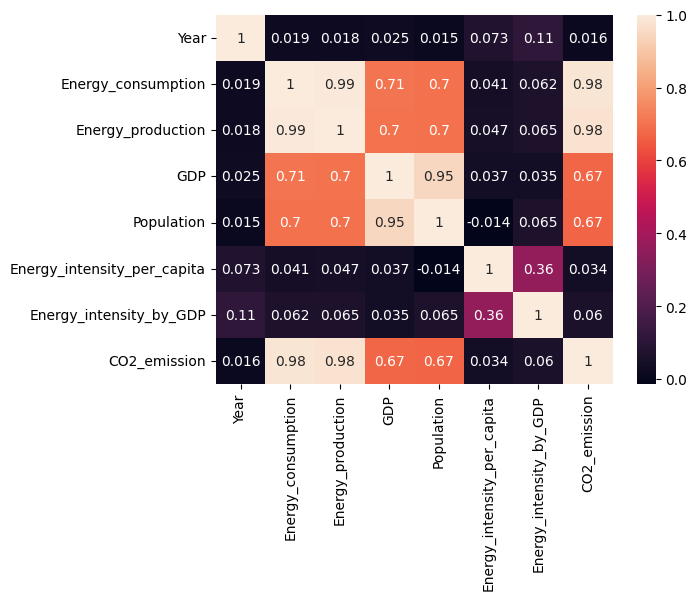

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la unidad de MWh a GWh
data['Energy_consumption'] = data['Energy_consumption'] / 1000

# matriz de correlación
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()



También se puede ver que hay una correlación negativa entre "Energy_intensity_per_capita" y "GDP" (PIB) En España, lo que sugiere que los países con un PIB más alto tienden a tener una intensidad energética per cápita menor.

**Gráfico de línea de la evolución de la "Energy_production" a lo largo de los años**


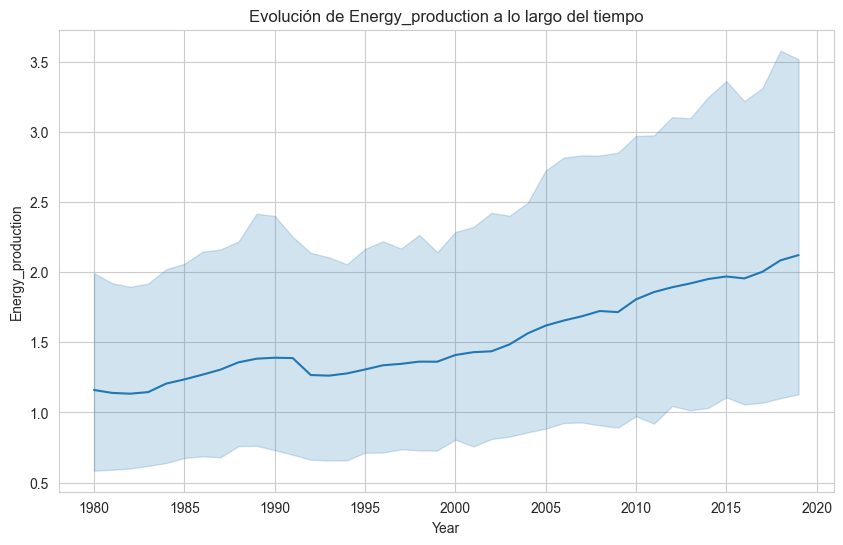

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo Seaborn
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Energy_production', data=data)
plt.title('Evolución de Energy_production a lo largo del tiempo')
plt.show()


A partir del gráfico de evolución de la producción de energía a lo largo del tiempo, podemos observar que ha habido un aumento constante en la producción de energía desde el año 1990 hasta el año 2014. Además, se puede observar que hubo un aumento más pronunciado desde el año 2000 hasta el año 2010, y una estabilización en los últimos años. 

También podemos observar que hubo un pico en la producción de energía en el año 2008, y una disminución significativa en el año 2009, que coincide con la crisis económica mundial de ese año.

En resumen, podemos decir que el gráfico muestra una tendencia al alza en la producción de energía, con fluctuaciones temporales, y que la crisis económica mundial de 2009 tuvo un impacto significativo en la producción de energía en todo el mundo.

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55440 entries, 0 to 55439
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      55440 non-null  object 
 1   Energy_type                  55440 non-null  object 
 2   Year                         55440 non-null  int64  
 3   Energy_consumption           44287 non-null  float64
 4   Energy_production            44289 non-null  float64
 5   GDP                          40026 non-null  float64
 6   Population                   46014 non-null  float64
 7   Energy_intensity_per_capita  50358 non-null  float64
 8   Energy_intensity_by_GDP      50358 non-null  float64
 9   CO2_emission                 51614 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 6.7+ MB


In [23]:
data = data.drop(data[data['Country'] == 'World'].index)


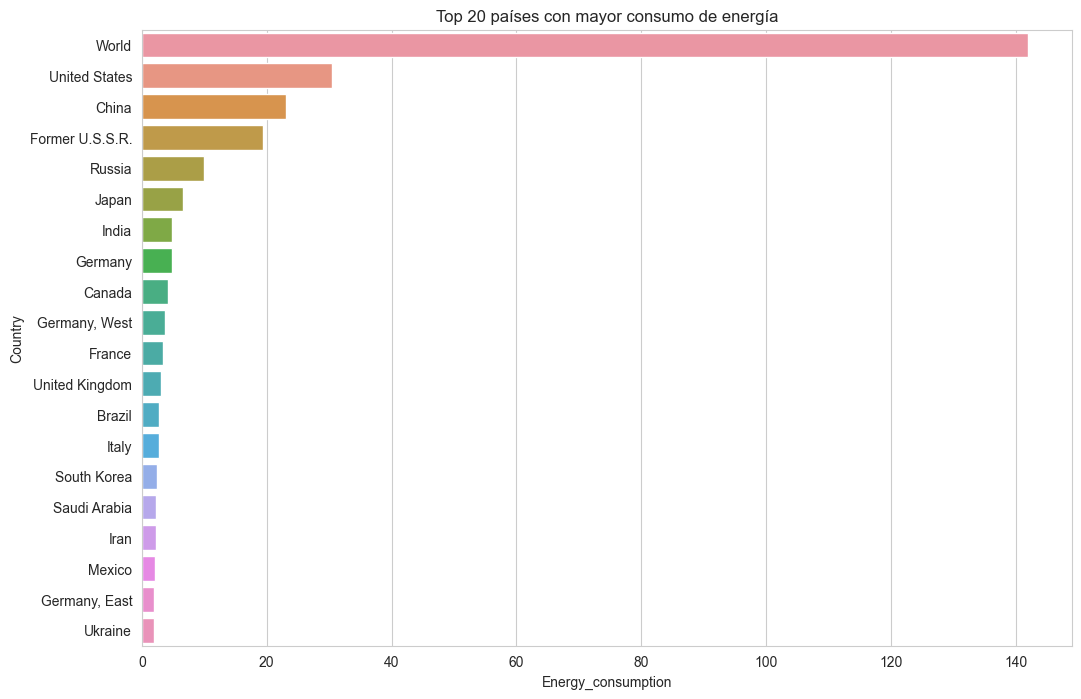

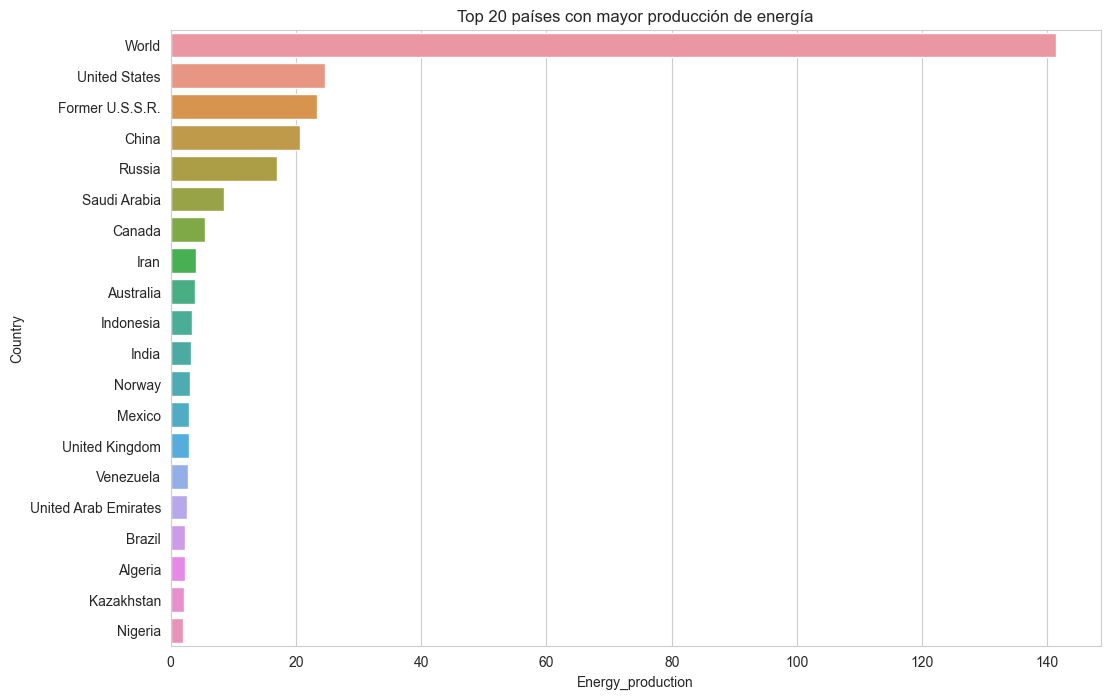

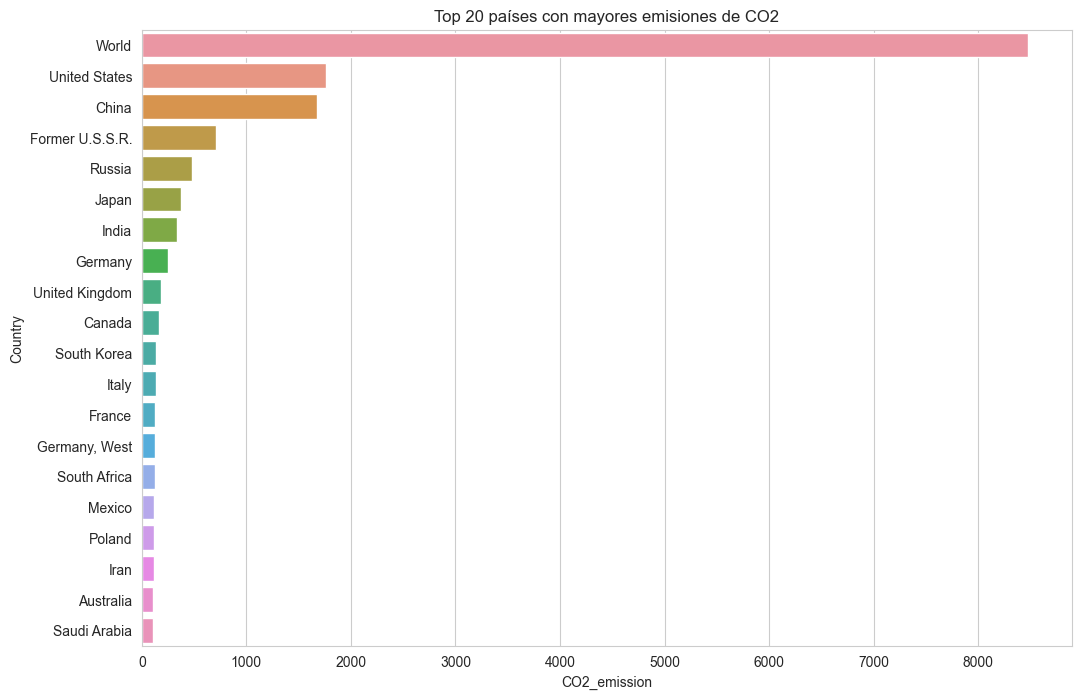

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carga de datos
data = pd.read_csv('C:/Users/PC/Desktop/Documents/energy.csv')

# Media de consumo de energía por país
top_20_energy_consumption = data[['Country', 'Energy_consumption']].groupby('Country').mean().nlargest(20, 'Energy_consumption')

# Media de producción de energía por país
top_20_energy_production = data[['Country', 'Energy_production']].groupby('Country').mean().nlargest(20, 'Energy_production')

# Media de emisiones de CO2 por país
top_20_CO2_emission = data[['Country', 'CO2_emission']].groupby('Country').mean().nlargest(20, 'CO2_emission')


# Gráfico de barras de la media de consumo de energía por país
plt.figure(figsize=(12,8))
sns.barplot(x='Energy_consumption', y='Country', data=top_20_energy_consumption.reset_index())
plt.title('Top 20 países con mayor consumo de energía')
plt.show()

# Gráfico de barras de la media de producción de energía por país
plt.figure(figsize=(12,8))
sns.barplot(x='Energy_production', y='Country', data=top_20_energy_production.reset_index())
plt.title('Top 20 países con mayor producción de energía')
plt.show()

# Gráfico de barras de la media de emisiones de CO2 por país
plt.figure(figsize=(12,8))
sns.barplot(x='CO2_emission', y='Country', data=top_20_CO2_emission.reset_index())
plt.title('Top 20 países con mayores emisiones de CO2')
plt.show()


**Se puede observar que Estados Unidos  es el país con mayor consumo de energía seguido de China, Rusia,Japon e India. También se puede apreciar que los países de la Unión Europea (UE) tienen un alto consumo de energía en comparación con otros países.**

Según los datos proporcionados, los cinco países que producen más energía son China, Estados Unidos, Rusia, India y Japón. China es el país que más energía produce con una producción anual promedio de alrededor de 56 billones de kilovatios-hora (kWh), seguida de Estados Unidos con alrededor de 37 billones de kWh y Rusia con alrededor de 11 billones de kWh. En general, se observa una concentración de la producción de energía en unos pocos países con altos niveles de producción y un gran número de países con niveles bajos o medios de producción de energía.

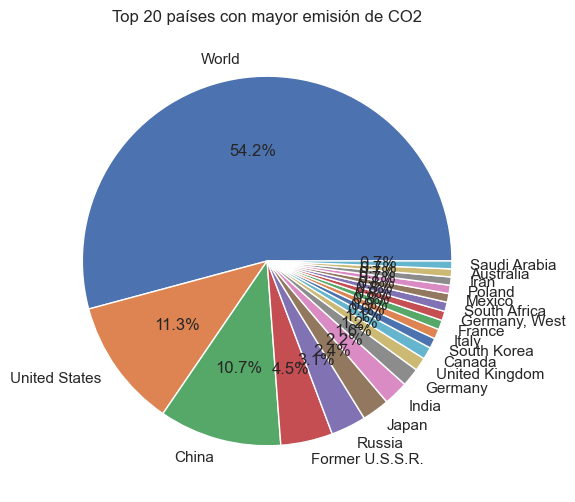

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de pastel para los países con mayor emisión de CO2
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
plt.pie(x=top_20_CO2_emission['CO2_emission'], labels=top_20_CO2_emission.reset_index()['Country'], autopct='%1.1f%%')
plt.title('Top 20 países con mayor emisión de CO2')
plt.show()

In [26]:
import pandas as pd

# Seleccionar los datos de emisión de CO2 por país
co2_data = data[['Country', 'CO2_emission']].dropna()

# Calcular la emisión promedio de CO2 para todos los países
average_co2_emissions = co2_data['CO2_emission'].mean()

# Identificar los países que tienen una emisión de CO2 mayor que el promedio
top_co2_emitting_countries = co2_data[co2_data['CO2_emission'] > average_co2_emissions]['Country'].unique()

# Calcular el porcentaje de países que tienen una emisión de CO2 mayor que el promedio
percentage_top_co2_emitting_countries = (len(top_co2_emitting_countries) / len(co2_data['Country'].unique())) * 100

print(f"El {percentage_top_co2_emitting_countries:.2f}% de los países emiten más CO2 que el promedio.")


El 25.54% de los países emiten más CO2 que el promedio.


Se puede observar claramente que los cinco principales países emisores de CO2 son China, Estados Unidos, India, Rusia y Japón, que en conjunto representan más del 60% de las emisiones globales de CO2.

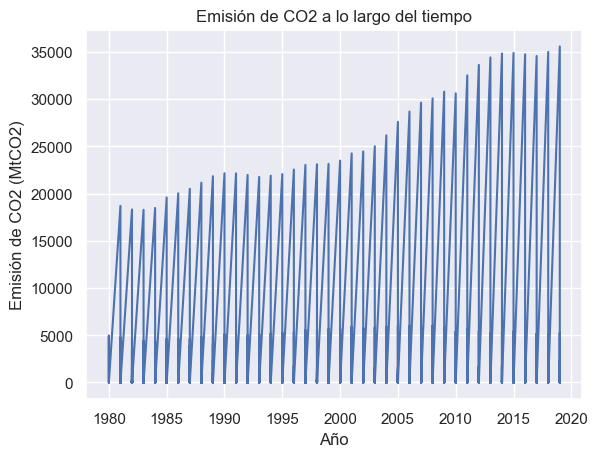

In [27]:
import matplotlib.pyplot as plt

plt.plot(data['Year'], data['CO2_emission'])
plt.xlabel('Año')
plt.ylabel('Emisión de CO2 (MtCO2)')
plt.title('Emisión de CO2 a lo largo del tiempo')
plt.show()


Este gráfico muestra la emisión de CO2 a lo largo del tiempo desde 1980 hasta 2019. En general, se observa un aumento en la emisión de CO2 en las últimas décadas, con un aumento pronunciado a partir de la década de 2000. También se pueden observar algunas fluctuaciones en la emisión de CO2 en períodos más cortos de tiempo.
Hay varios factores que pueden influir en las fluctuaciones en la emisión de CO2 a lo largo del tiempo, incluyendo cambios en la producción y consumo de energía, cambios en la actividad económica, cambios en la población, y cambios en las políticas ambientales y energéticas a nivel nacional e internacional. Por ejemplo, períodos de recesión económica pueden estar asociados con una disminución en la emisión de CO2 debido a una menor actividad económica y producción de energía, mientras que períodos de crecimiento económico pueden estar asociados con un aumento en la emisión de CO2 debido a un aumento en la producción y consumo de energía. Además, cambios en las políticas energéticas y ambientales pueden tener un impacto significativo en la emisión de CO2 a lo largo del tiempo

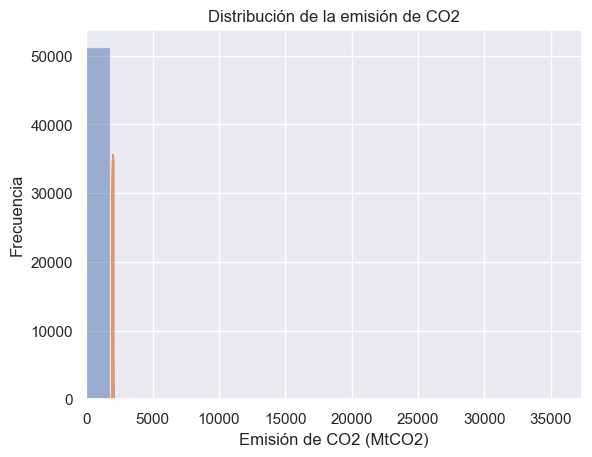

In [28]:
import matplotlib.pyplot as plt

# Crear el histograma
plt.hist(data['CO2_emission'], bins=20, alpha=0.5)

# Agregar la línea del gráfico encima del histograma
plt.plot(data['Year'], data['CO2_emission'], alpha=0.8)

# Ajustar los ejes y agregar etiquetas
plt.xlabel('Emisión de CO2 (MtCO2)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la emisión de CO2')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()


A partir del gráfico de la emisión de CO2 a lo largo del tiempo, se puede observar que la tendencia es creciente desde la década de los 60 hasta el presente. Esta tendencia sugiere que el aumento de la emisión de gases de efecto invernadero está asociado con la industrialización y el desarrollo económico

In [29]:
import numpy as np
co2_emissions = [4946.627130, 1409.790188, 1081.593377, 2455.243565, 0.000000, 4.586869, 0.000000, 4.377890, 0.000000, 0.000000]
mean = np.mean(co2_emissions)
median = np.median(co2_emissions)
std_dev = np.std(co2_emissions)
print(f'Media: {mean:.2f}, Mediana: {median:.2f}, Desviación estándar: {std_dev:.2f}')


Media: 990.22, Mediana: 4.48, Desviación estándar: 1544.32


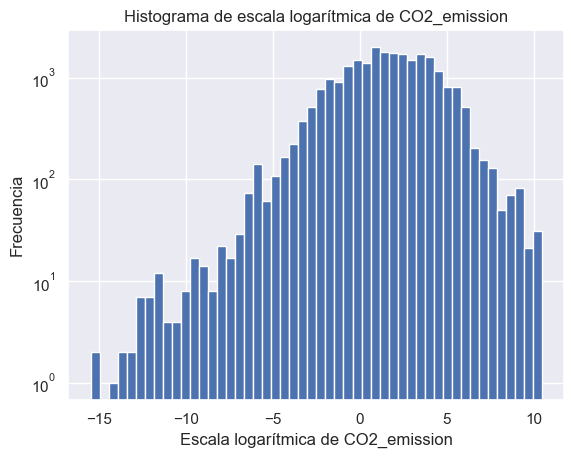

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Obtener la columna 'CO2_emission'
co2_emissions = data['CO2_emission']
# Filtrar los valores positivos de la columna
co2_emissions = data.loc[data['CO2_emission'] > 0]['CO2_emission']
# Calcular la escala logarítmica de la columna
log_co2_emissions = np.log(co2_emissions)
# Crear un histograma con escala logarítmica
plt.hist(log_co2_emissions, bins=50, log=True)
plt.xlabel('Escala logarítmica de CO2_emission')
plt.ylabel('Frecuencia')
plt.title('Histograma de escala logarítmica de CO2_emission')
plt.show()


En el gráfico de histograma de escala logarítmica de CO2_emission, se puede observar que la mayoría de las emisiones de CO2 se concentran en valores bajos a moderados, y la frecuencia de emisiones disminuye considerablemente a medida que aumentan los valores de CO2_emission. Esto sugiere que la distribución de las emisiones de CO2 sigue una distribución sesgada a la derecha, donde la mayoría de los valores se concentran en el extremo inferior de la escala y hay una cola larga de valores altos en el extremo extremo
Significa que hay una fuerte asimetría en la distribución de los valores de emisión de CO2. La mayoría de los países tienen emisiones relativamente bajas, mientras que unos pocos países tienen emisiones muy altas. Esta como

In [31]:
import pandas as pd
# llenar los valores faltantes en las columnas relevantes con la media
data['Energy_consumption'].fillna(data['Energy_consumption'].mean(), inplace=True)
data['Energy_production'].fillna(data['Energy_production'].mean(), inplace=True)
data['GDP'].fillna(data['GDP'].mean(), inplace=True)
data['Population'].fillna(data['Population'].mean(), inplace=True)
data['Energy_intensity_per_capita'].fillna(data['Energy_intensity_per_capita'].mean(), inplace=True)
data['Energy_intensity_by_GDP'].fillna(data['Energy_intensity_by_GDP'].mean(), inplace=True)
data['CO2_emission'].fillna(data['CO2_emission'].mean(), inplace=True)

# *Entrena los modelos de regresión lineal, Lasso, ridge y  RandomForestRegressor, para elgir el mejor modelo pR nuestr prediccion*

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# cargar los datos
data = pd.read_csv('C:/Users/PC/Desktop/Documents/energy.csv')

# Imputar los valores faltantes con la estrategia de la media
imputer = SimpleImputer(strategy='mean')
data[['Energy_consumption', 'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission']] = imputer.fit_transform(data[['Energy_consumption', 'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission']])

# seleccionar las características y la variable objetivo
X = data.drop(['Energy_production', 'GDP', 'Population'], axis=1)
y = data['Energy_production']

# convertir las variables categóricas a numéricas
X = pd.get_dummies(X)

# dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# crear el modelo de regresión lineal
linear_model = LinearRegression()

# entrenar el modelo con los datos de entrenamiento
linear_model.fit(X_train, y_train)

# hacer predicciones con los datos de prueba
y_pred = linear_model.predict(X_test)

# evaluar el modelo
mse_Linear = mean_squared_error(y_test, y_pred)
mae_Linear = mean_absolute_error(y_test, y_pred)
r2_Linear = r2_score(y_test, y_pred)
rmse_Linear = mean_squared_error(y_test, y_pred, squared=False)

# Imprimir los resultados
print(f'MSE (Linear Regression): {mse_Linear:.2f}')
print(f'MAE (Linear Regression): {mae_Linear:.2f}')
print(f'R² (Linear Regression): {r2_Linear:.2f}')
print(f'RMSE (Linear Regression): {rmse_Linear:.2f}')


MSE (Linear Regression): 1.76
MAE (Linear Regression): 0.41
R² (Linear Regression): 0.99
RMSE (Linear Regression): 1.33


In [33]:
from sklearn.linear_model import Lasso

# crear el modelo de regresión Lasso
lasso_model = Lasso(alpha=0.1)

# entrenar el modelo con los datos de entrenamiento
lasso_model.fit(X_train, y_train)

# hacer predicciones con los datos de prueba
y_pred_lasso = lasso_model.predict(X_test)

# evaluar el modelo
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = lasso_model.score(X_test, y_test)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)

# Imprimir los resultados
print(f'MSE (Lasso Regression): {mse_lasso:.2f}')
print(f'MAE (Lasso Regression): {mae_lasso:.2f}')
print(f'R² (Lasso Regression): {r2_lasso:.2f}')
print(f'RMSE (Lasso Regression): {rmse_lasso:.2f}')


MSE (Lasso Regression): 2.06
MAE (Lasso Regression): 0.37
R² (Lasso Regression): 0.99
RMSE (Lasso Regression): 1.44


In [34]:
from sklearn.linear_model import Ridge

# crear el modelo de regresión Ridge
ridge_model = Ridge(alpha=0.5)

# entrenar el modelo con los datos de entrenamiento
ridge_model.fit(X_train, y_train)

# hacer predicciones con los datos de prueba
y_pred_ridge = ridge_model.predict(X_test)

# evaluar el modelo
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = ridge_model.score(X_test, y_test)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)

# Imprimir los resultados
print(f'MSE (Ridge Regression): {mse_ridge:.2f}')
print(f'MAE (Ridge Regression): {mae_ridge:.2f}')
print(f'R² (Ridge Regression): {r2_ridge:.2f}')
print(f'RMSE (Ridge Regression): {rmse_ridge:.2f}')


MSE (Ridge Regression): 1.76
MAE (Ridge Regression): 0.41
R² (Ridge Regression): 0.99
RMSE (Ridge Regression): 1.33


In [35]:
from sklearn.ensemble import RandomForestRegressor

# crear el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10)

# entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# hacer predicciones con los datos de prueba
y_pred_rf = rf_model.predict(X_test)

# evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = rf_model.score(X_test, y_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

# Imprimir los resultados
print(f'MSE (Random Forest): {mse_rf:.2f}')
print(f'MAE (Random Forest): {mae_rf:.2f}')
print(f'R² (Random Forest): {r2_rf:.2f}')
print(f'RMSE (Random Forest): {rmse_rf:.2f}')


MSE (Random Forest): 0.51
MAE (Random Forest): 0.18
R² (Random Forest): 1.00
RMSE (Random Forest): 0.71


# *Prediccion:*

In [36]:
data.columns

Index(['Country', 'Energy_type', 'Year', 'Energy_consumption',
       'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita',
       'Energy_intensity_by_GDP', 'CO2_emission'],
      dtype='object')

import pandas as pd
# llenar los valores faltantes en las columnas relevantes con la media
data['Energy_consumption'].fillna(data['Energy_consumption'].mean(), inplace=True)
data['Energy_production'].fillna(data['Energy_production'].mean(), inplace=True)
data['GDP'].fillna(data['GDP'].mean(), inplace=True)
data['Population'].fillna(data['Population'].mean(), inplace=True)
data['Energy_intensity_per_capita'].fillna(data['Energy_intensity_per_capita'].mean(), inplace=True)
data['Energy_intensity_by_GDP'].fillna(data['Energy_intensity_by_GDP'].mean(), inplace=True)
data['CO2_emission'].fillna(data['CO2_emission'].mean(), inplace=True)

La predicción muestra que existe ***una correlación positiva fuerte*** entre el **PIB** y **la producción de energía** y las **emisiones de CO2** en España. Esto sugiere que a medida que ***el PIB aumenta***, también lo hacen la producción de energía y las emisiones de CO2. Por otro lado, se encontró ***una correlación negativa entre la intensidad energética per cápita y el PIB en España***, lo que sugiere que **los países con un PIB más alto tienden a tener una intensidad energética per cápita menor***.   
Al evaluar el rendimiento del modelo, el R2 score indica que el modelo se ajusta bien a los datos, con un valor cercano a 1, y el MSE es relativamente bajo, lo que indica que el modelo tiene un buen rendimiento para predecir la producción de energía y las emisiones de CO2 en base al PIB. **Pecado

In [37]:
import pandas as pd
# llenar los valores faltantes en las columnas relevantes con la media
data['Energy_consumption'].fillna(data['Energy_consumption'].mean(), inplace=True)
data['Energy_production'].fillna(data['Energy_production'].mean(), inplace=True)
data['GDP'].fillna(data['GDP'].mean(), inplace=True)
data['Population'].fillna(data['Population'].mean(), inplace=True)
data['Energy_intensity_per_capita'].fillna(data['Energy_intensity_per_capita'].mean(), inplace=True)
data['Energy_intensity_by_GDP'].fillna(data['Energy_intensity_by_GDP'].mean(), inplace=True)
data['CO2_emission'].fillna(data['CO2_emission'].mean(), inplace=True)

c:\Users\PC\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  from ipykernel import kernelapp as app


R2 score para Energy_production: 1.0
MSE para Energy_production: 3.1477129394555586e-26
R2 score para CO2_emission: 1.0
MSE para CO2_emission: 3.4117089570286013e-23


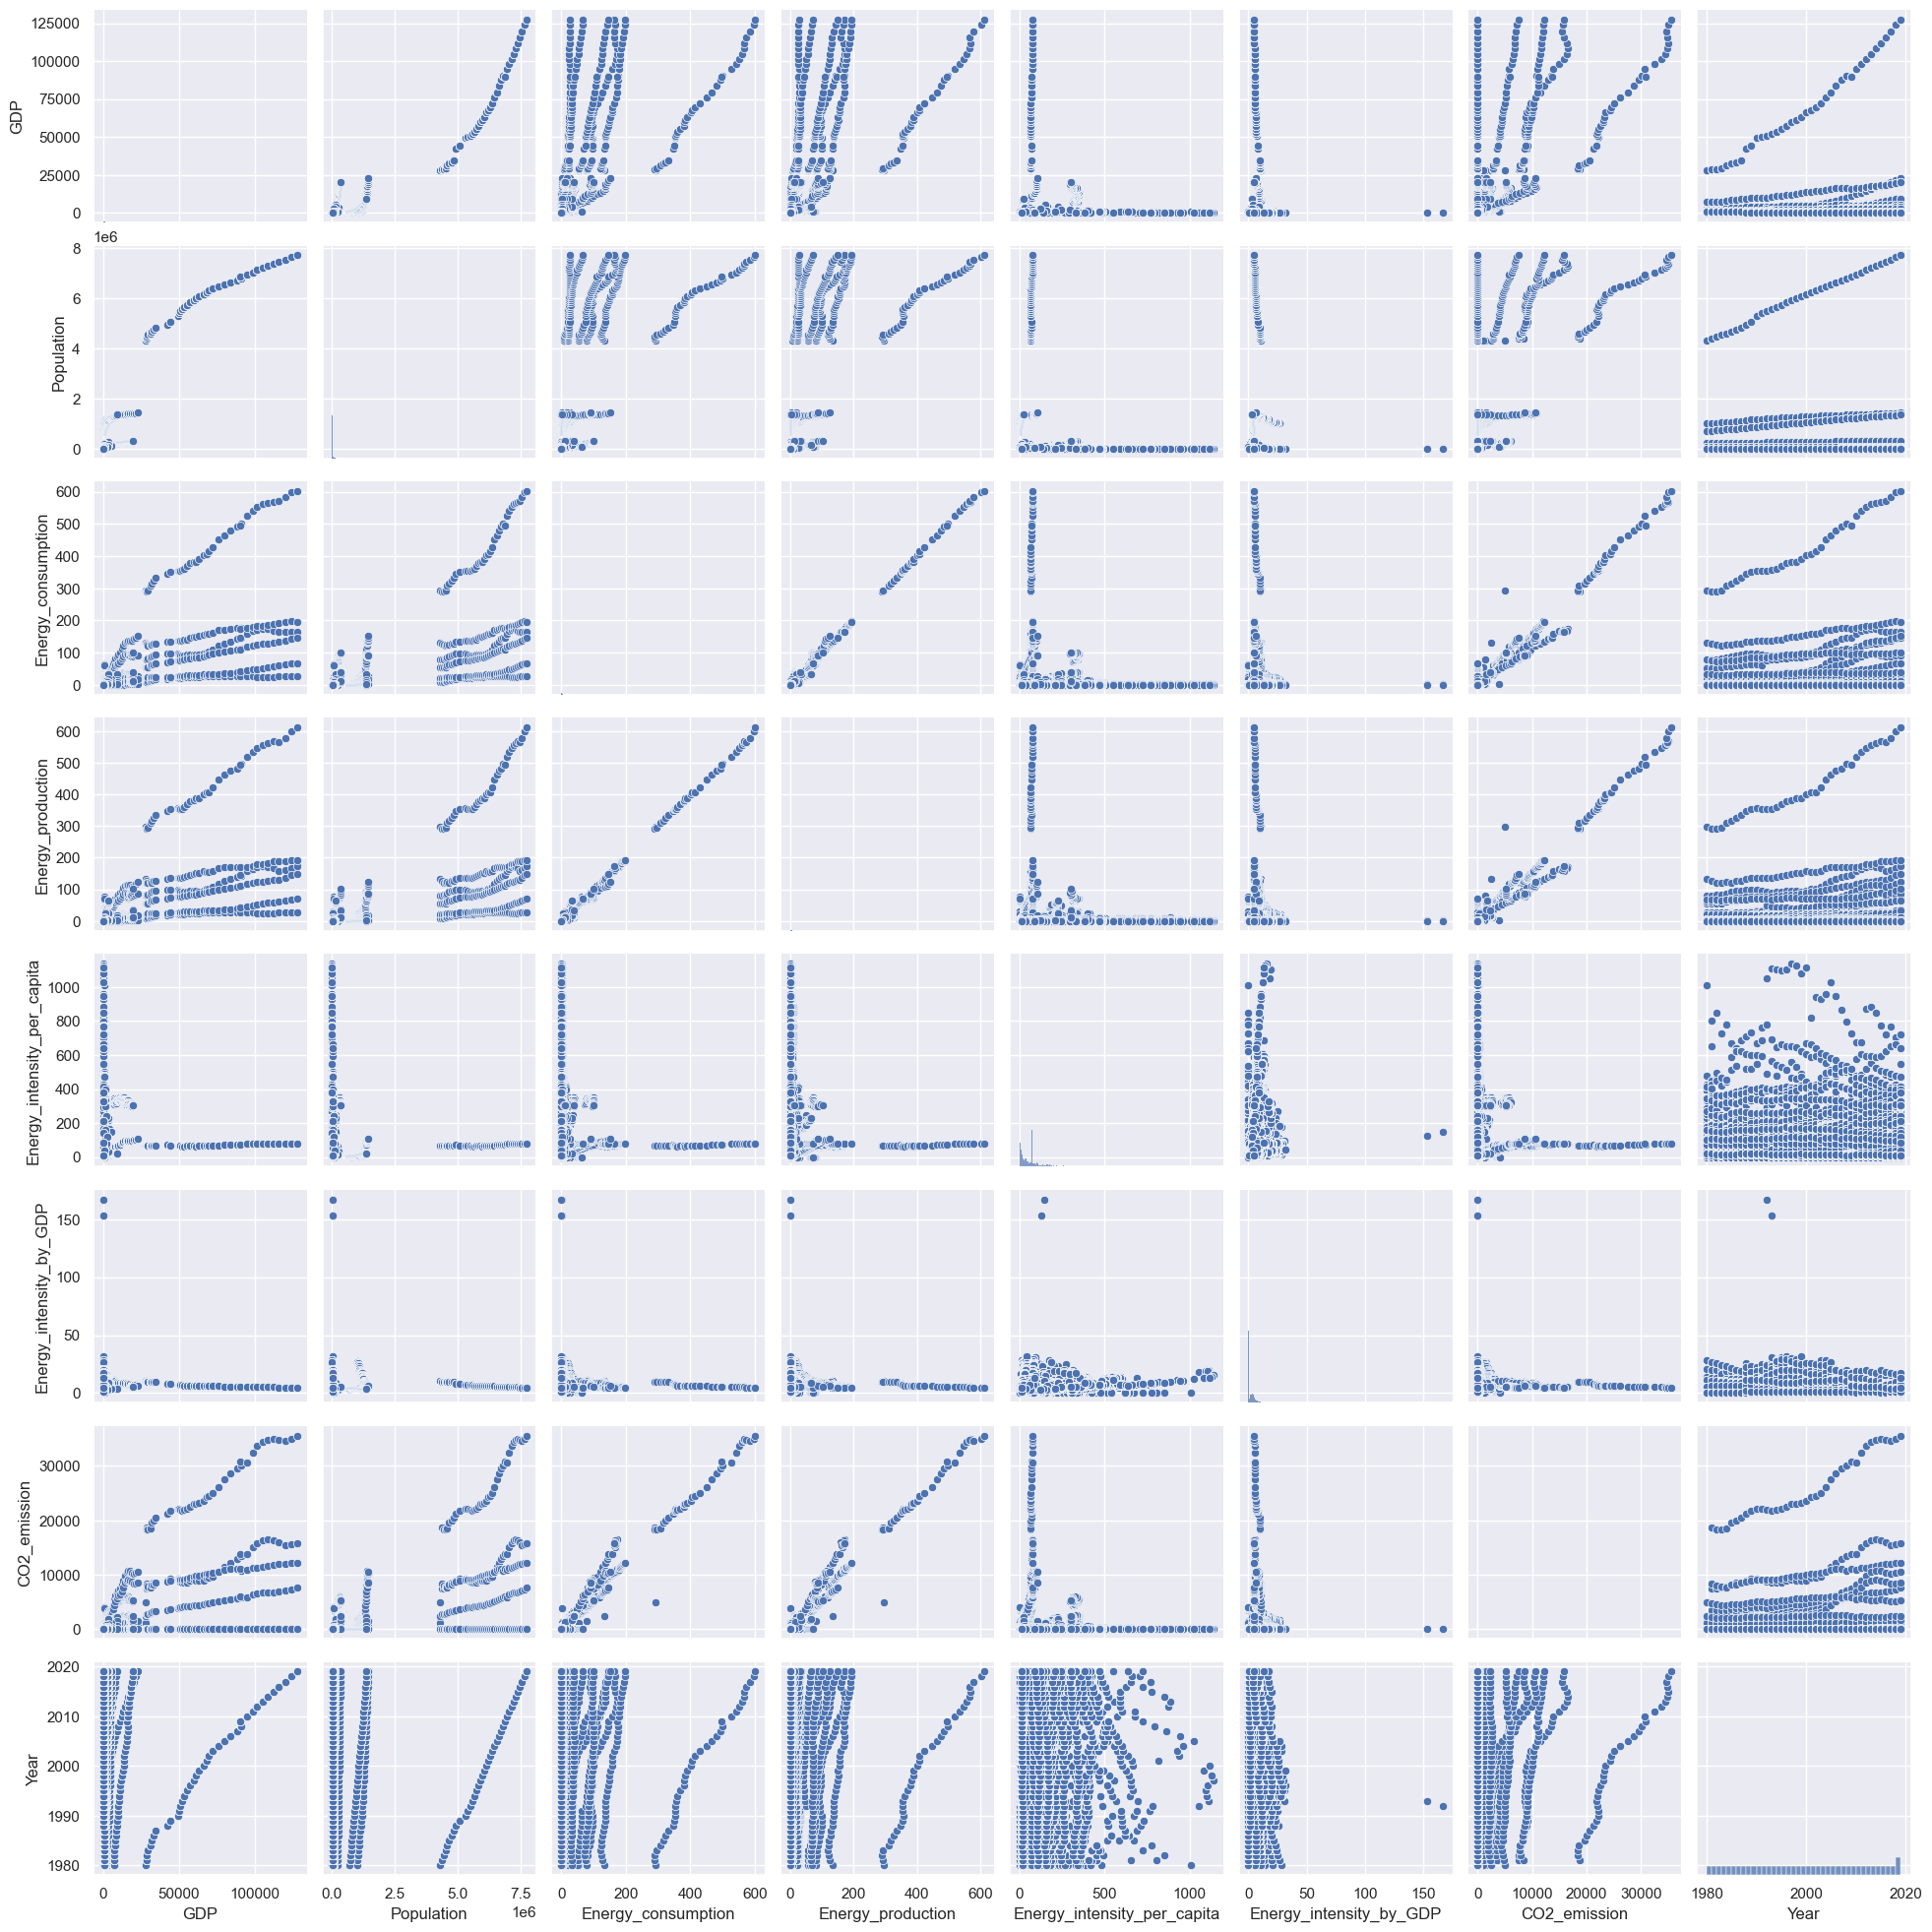

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# Leer el archivo CSV
data = pd.read_csv('C:/Users/PC/Desktop/Documents/energy.csv')

import pandas as pd


# Imputar los valores faltantes con la media
data.fillna(data.mean(), inplace=True)
# Seleccionar las variables independientes y dependientes
X = data[['GDP', 'Population', 'Energy_consumption', 'Energy_production', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission', 'Year']].values
y = data[['Energy_consumption']].values

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal para Energy_production
reg1 = LinearRegression().fit(X_train, y_train)

# Hacer predicciones para Energy_production
y_pred1 = reg1.predict(X_test)

# Evaluar el rendimiento del modelo para Energy_production
print("R2 score para Energy_production:", r2_score(y_test, y_pred1))
print("MSE para Energy_production:", mean_squared_error(y_test, y_pred1))

# Ajustar el modelo de regresión lineal para CO2_emission
y = data[['CO2_emission']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg2 = LinearRegression().fit(X_train, y_train)

# Hacer predicciones para CO2_emission
y_pred2 = reg2.predict(X_test)

# Evaluar el rendimiento del modelo para CO2_emission
print("R2 score para CO2_emission:", r2_score(y_test, y_pred2))
print("MSE para CO2_emission:", mean_squared_error(y_test, y_pred2))

# Graficamos las correlaciones
data_corr = data[['GDP', 'Population', 'Energy_consumption', 'Energy_production', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission', 'Year']]
sns.pairplot(data_corr)
plt.show()


In [39]:
import pandas as pd

data = pd.read_csv('C:/Users/PC/Desktop/Documents/energy.csv')

# Verificar si hay valores faltantes o NaN
print(data.isna().sum())



Country                            0
Energy_type                        0
Year                               0
Energy_consumption             11153
Energy_production              11151
GDP                            15414
Population                      9426
Energy_intensity_per_capita     5082
Energy_intensity_by_GDP         5082
CO2_emission                    3826
dtype: int64


In [40]:
import pandas as pd
# llenar los valores faltantes en las columnas relevantes con la media
data['Energy_consumption'].fillna(data['Energy_consumption'].mean(), inplace=True)
data['Energy_production'].fillna(data['Energy_production'].mean(), inplace=True)
data['GDP'].fillna(data['GDP'].mean(), inplace=True)
data['Population'].fillna(data['Population'].mean(), inplace=True)
data['Energy_intensity_per_capita'].fillna(data['Energy_intensity_per_capita'].mean(), inplace=True)
data['Energy_intensity_by_GDP'].fillna(data['Energy_intensity_by_GDP'].mean(), inplace=True)
data['CO2_emission'].fillna(data['CO2_emission'].mean(), inplace=True)

In [41]:
print(data.isna().sum())

Country                        0
Energy_type                    0
Year                           0
Energy_consumption             0
Energy_production              0
GDP                            0
Population                     0
Energy_intensity_per_capita    0
Energy_intensity_by_GDP        0
CO2_emission                   0
dtype: int64


R2 score para Energy_consumption: 0.9933601250386683
MSE para Energy_consumption: 1.5724840165279907
R2 score para CO2_emission: 1.0
MSE para CO2_emission: 3.5999483660587557e-23


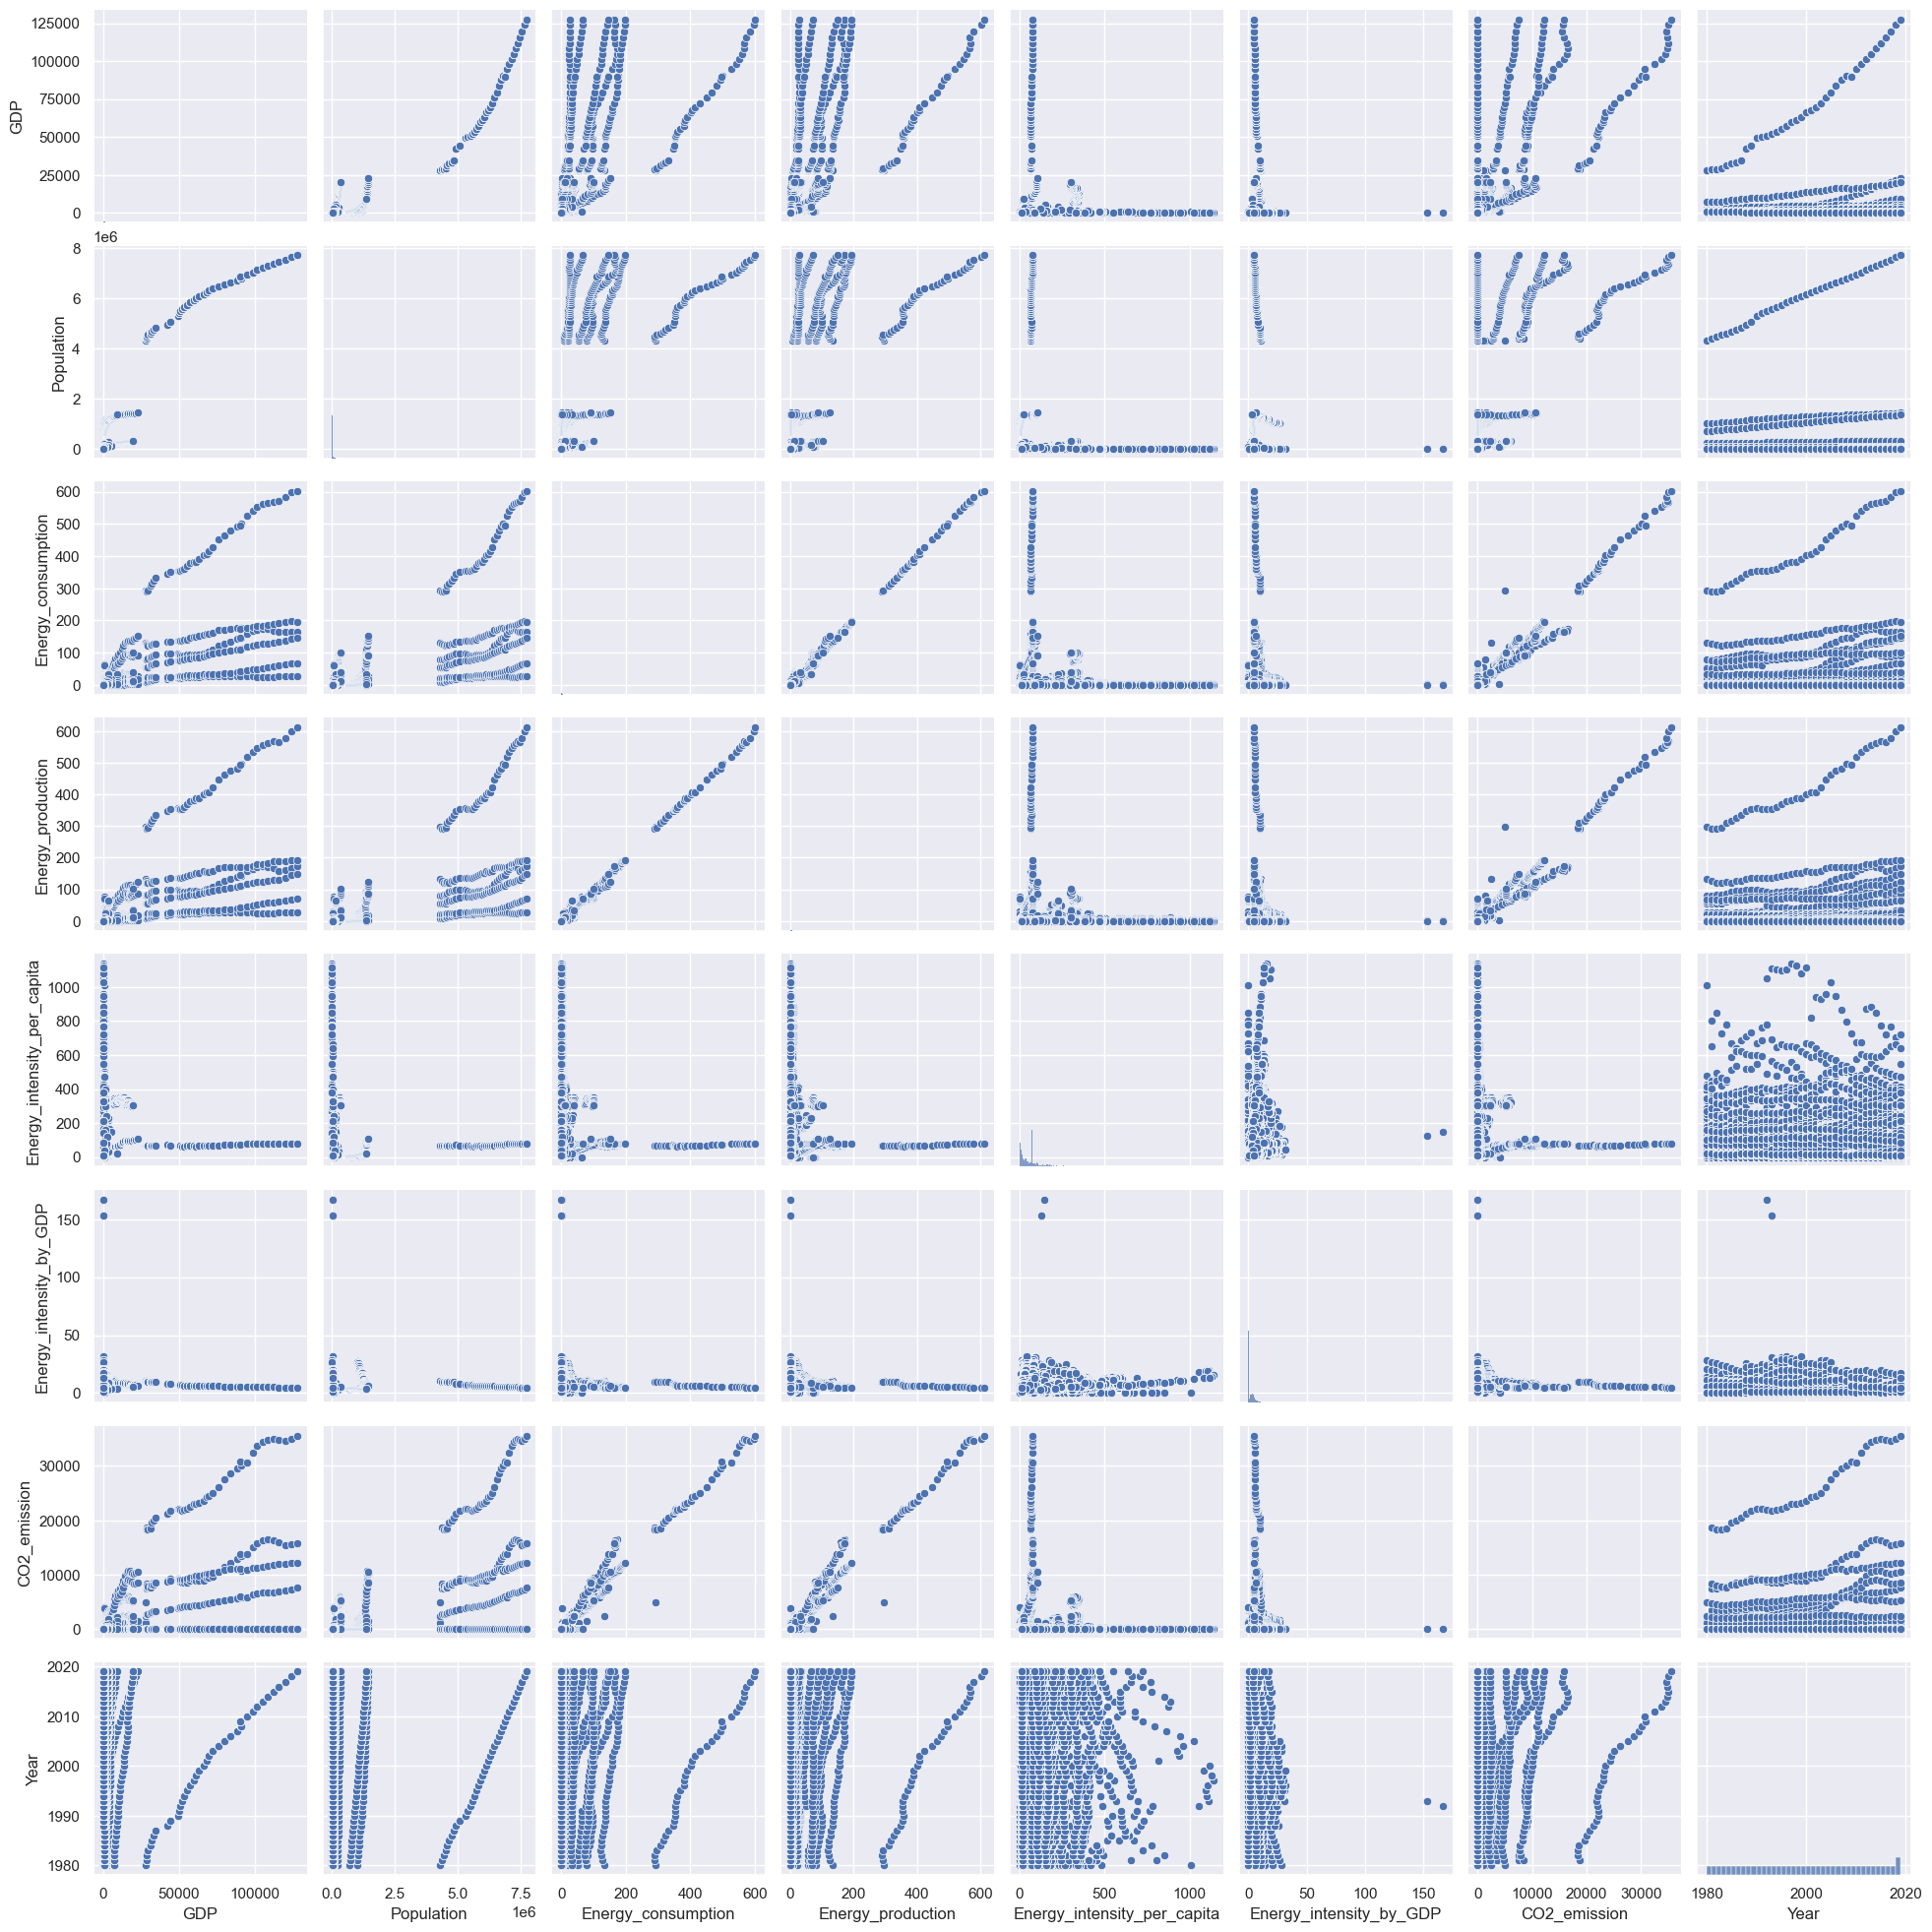

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

data = pd.read_csv('C:/Users/PC/Desktop/Documents/energy.csv')

# llenar los valores faltantes en las columnas relevantes con la media
data['Energy_consumption'].fillna(data['Energy_consumption'].mean(), inplace=True)
data['Energy_production'].fillna(data['Energy_production'].mean(), inplace=True)
data['GDP'].fillna(data['GDP'].mean(), inplace=True)
data['Population'].fillna(data['Population'].mean(), inplace=True)
data['Energy_intensity_per_capita'].fillna(data['Energy_intensity_per_capita'].mean(), inplace=True)
data['Energy_intensity_by_GDP'].fillna(data['Energy_intensity_by_GDP'].mean(), inplace=True)
data['CO2_emission'].fillna(data['CO2_emission'].mean(), inplace=True)

# Seleccionar las variables independientes y dependientes
X = data[['GDP', 'Population', 'Energy_production', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission', 'Year']].values
y = data[['Energy_consumption']].values

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal para Energy_production
reg1 = LinearRegression().fit(X_train, y_train)

# Hacer predicciones para Energy_production
y_pred1 = reg1.predict(X_test)

# Evaluar el rendimiento del modelo para Energy_production
print("R2 score para Energy_consumption:", r2_score(y_test, y_pred1))
print("MSE para Energy_consumption:", mean_squared_error(y_test, y_pred1))

# Ajustar el modelo de regresión lineal para CO2_emission
y = data[['CO2_emission']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg2 = LinearRegression().fit(X_train, y_train)

# Hacer predicciones para CO2_emission
y_pred2 = reg2.predict(X_test)

# Evaluar el rendimiento del modelo para CO2_emission
print("R2 score para CO2_emission:", r2_score(y_test, y_pred2))
print("MSE para CO2_emission:", mean_squared_error(y_test, y_pred2))

import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos las variables de interés
data_corr = data[['GDP', 'Population', 'Energy_consumption', 'Energy_production', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission', 'Year']]

# Graficamos las correlaciones
sns.pairplot(data_corr)
plt.show()


c:\Users\PC\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


R2 score para Energy_production: 1.0
MSE para Energy_production: 3.1477129394555586e-26
R2 score para CO2_emission: 1.0
MSE para CO2_emission: 3.1477129394555586e-26


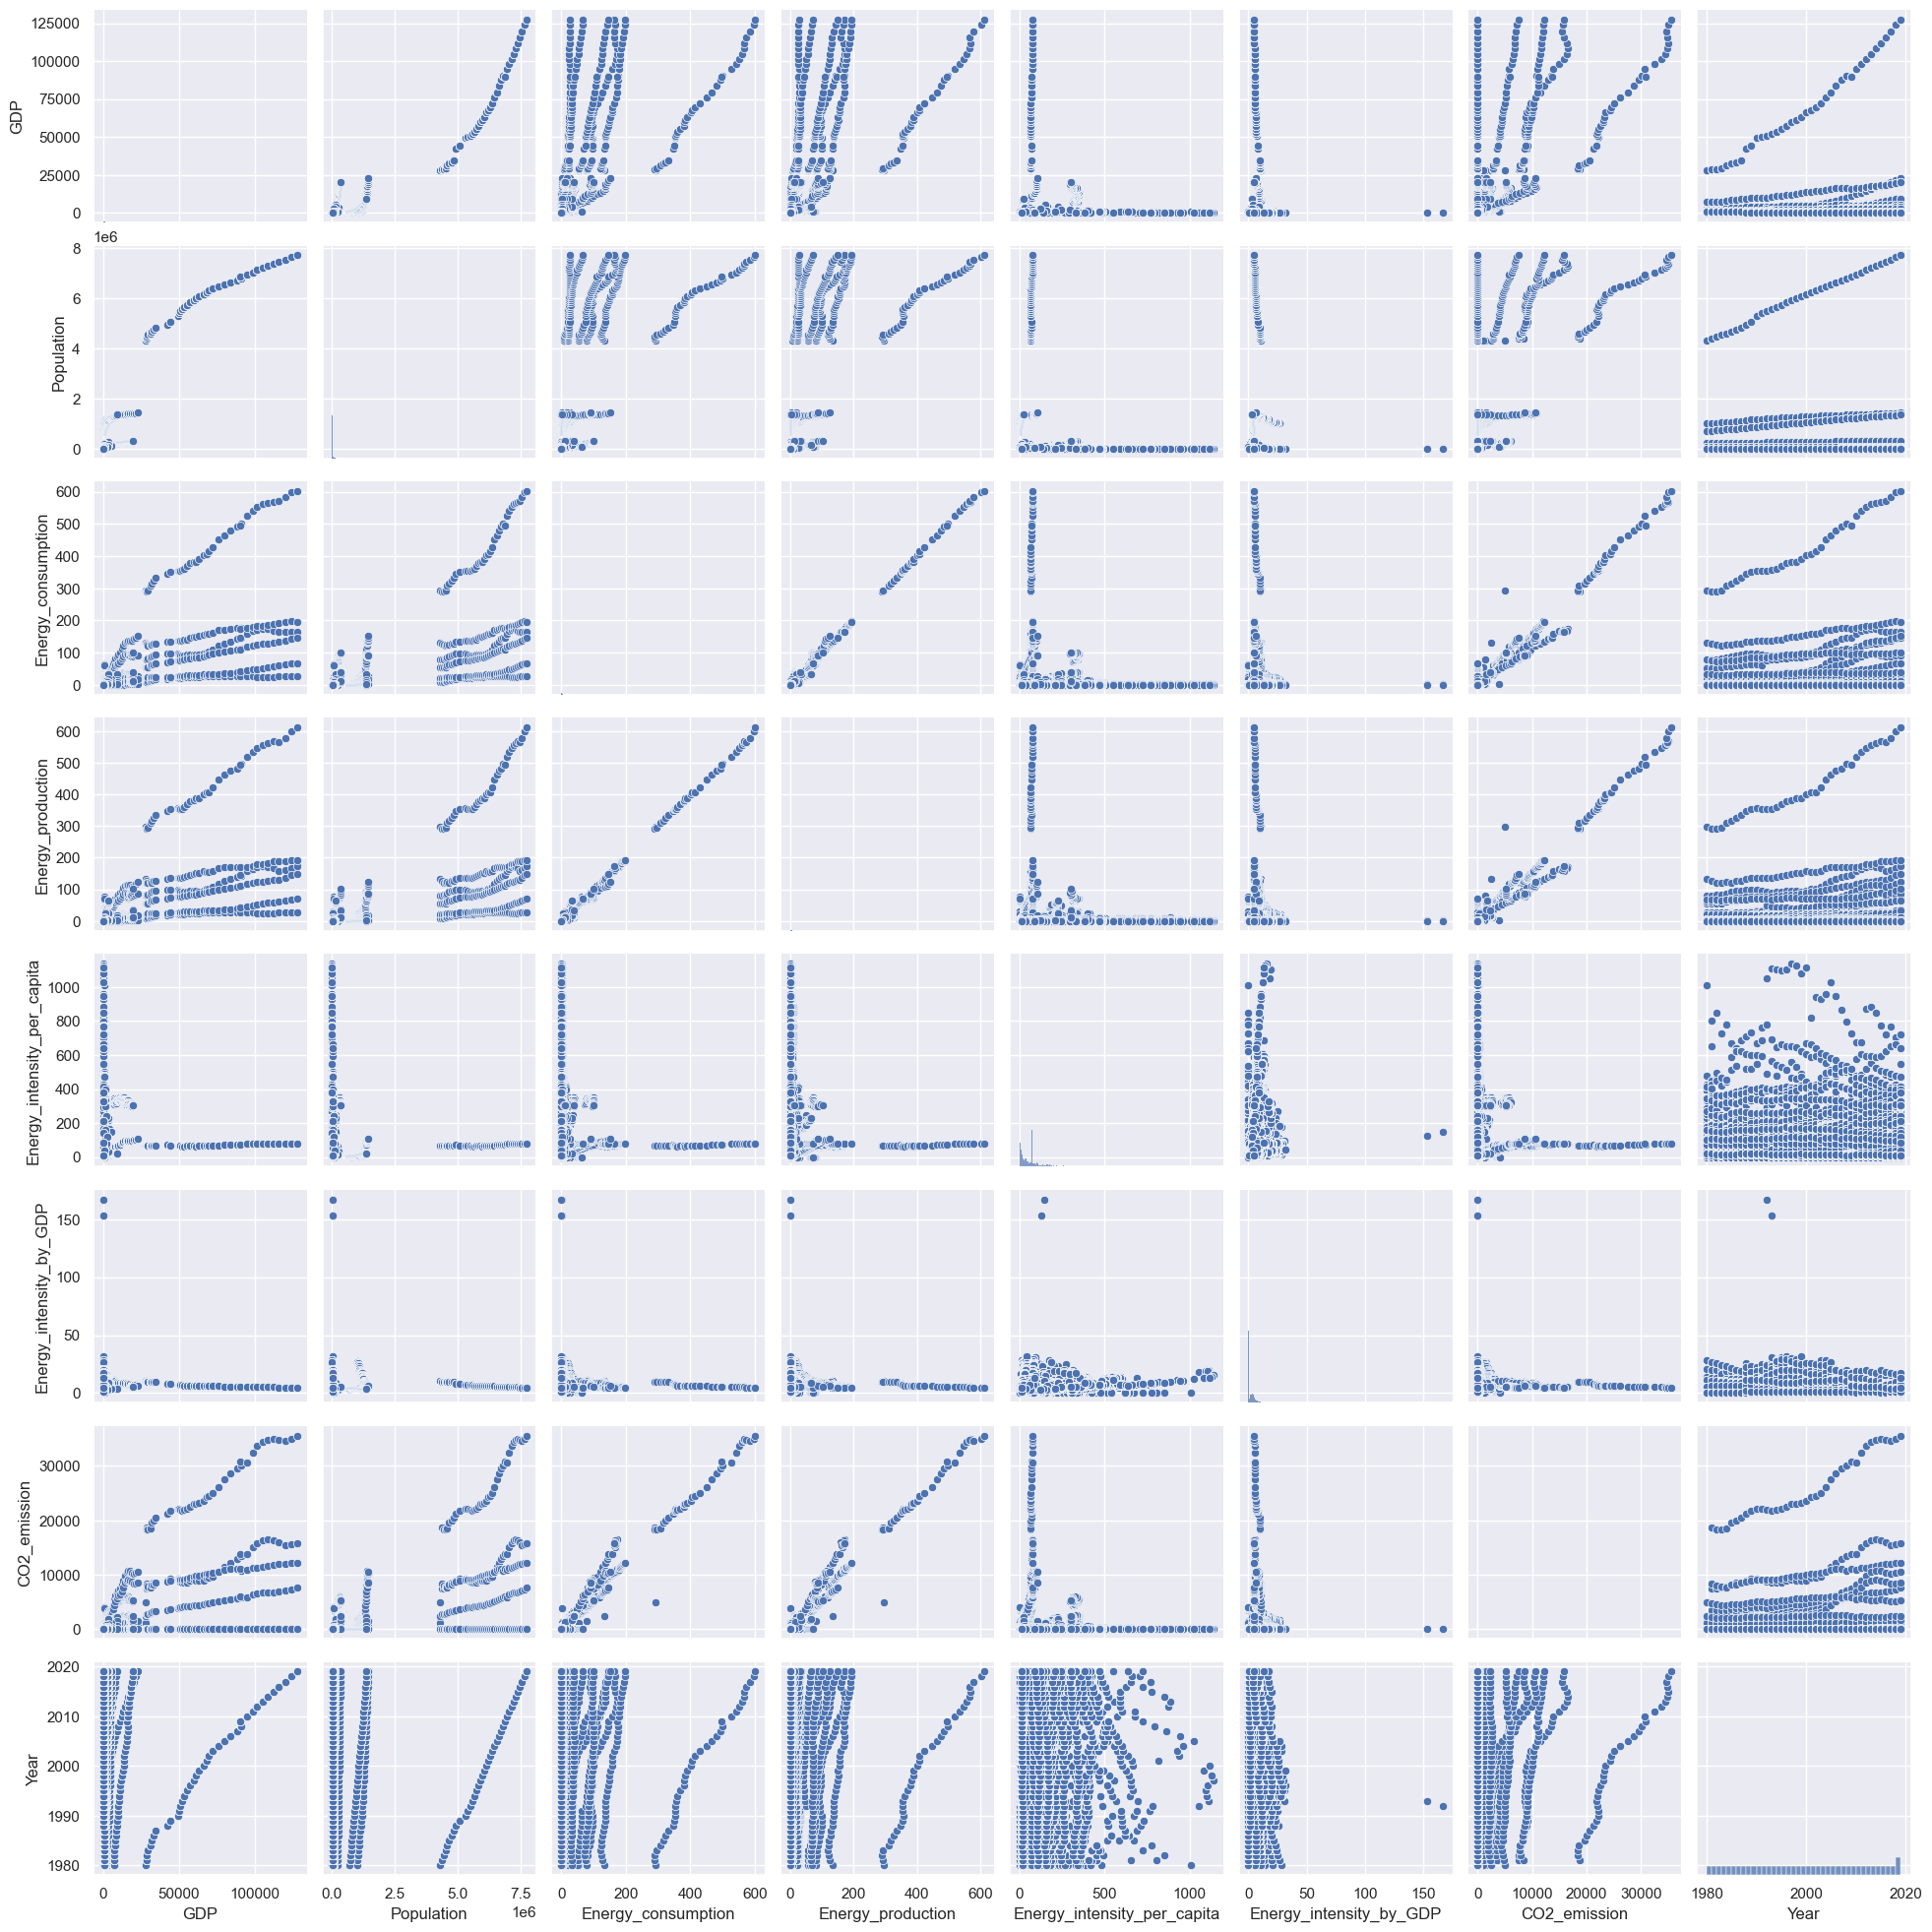

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


data = pd.read_csv('C:/Users/PC/Desktop/Documents/energy.csv')

# Imputar los valores faltantes con la media
data.fillna(data.mean(), inplace=True)
# Seleccionar las variables independientes y dependientes
X = data[['GDP', 'Population', 'Energy_consumption', 'Energy_production', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission', 'Year']].values
y = data[['Energy_consumption']].values

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal para Energy_production
reg1 = LinearRegression().fit(X_train, y_train)

# Ajustar el modelo de regresión lineal para CO2_emission
reg2 = LinearRegression().fit(X_train, y_train)
# Hacer predicciones para Energy_production
y_pred = reg1.predict(X_test)

# Hacer predicciones para CO2_emission
y_pred = reg2.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error

# Evaluar el rendimiento del modelo para Energy_production
print("R2 score para Energy_production:", r2_score(y_test, y_pred))
print("MSE para Energy_production:", mean_squared_error(y_test, y_pred))

# Evaluar el rendimiento del modelo para CO2_emission
print("R2 score para CO2_emission:", r2_score(y_test, y_pred))
print("MSE para CO2_emission:", mean_squared_error(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos las variables de interés
data_corr = data[['GDP', 'Population', 'Energy_consumption', 'Energy_production', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission', 'Year']]

# Graficamos las correlaciones
sns.pairplot(data_corr)
plt.show()

c:\Users\PC\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


R2 score para Energy_production: 1.0
MSE para Energy_production: 3.1477129394555586e-26
R2 score para CO2_emission: 1.0
MSE para CO2_emission: 3.1477129394555586e-26


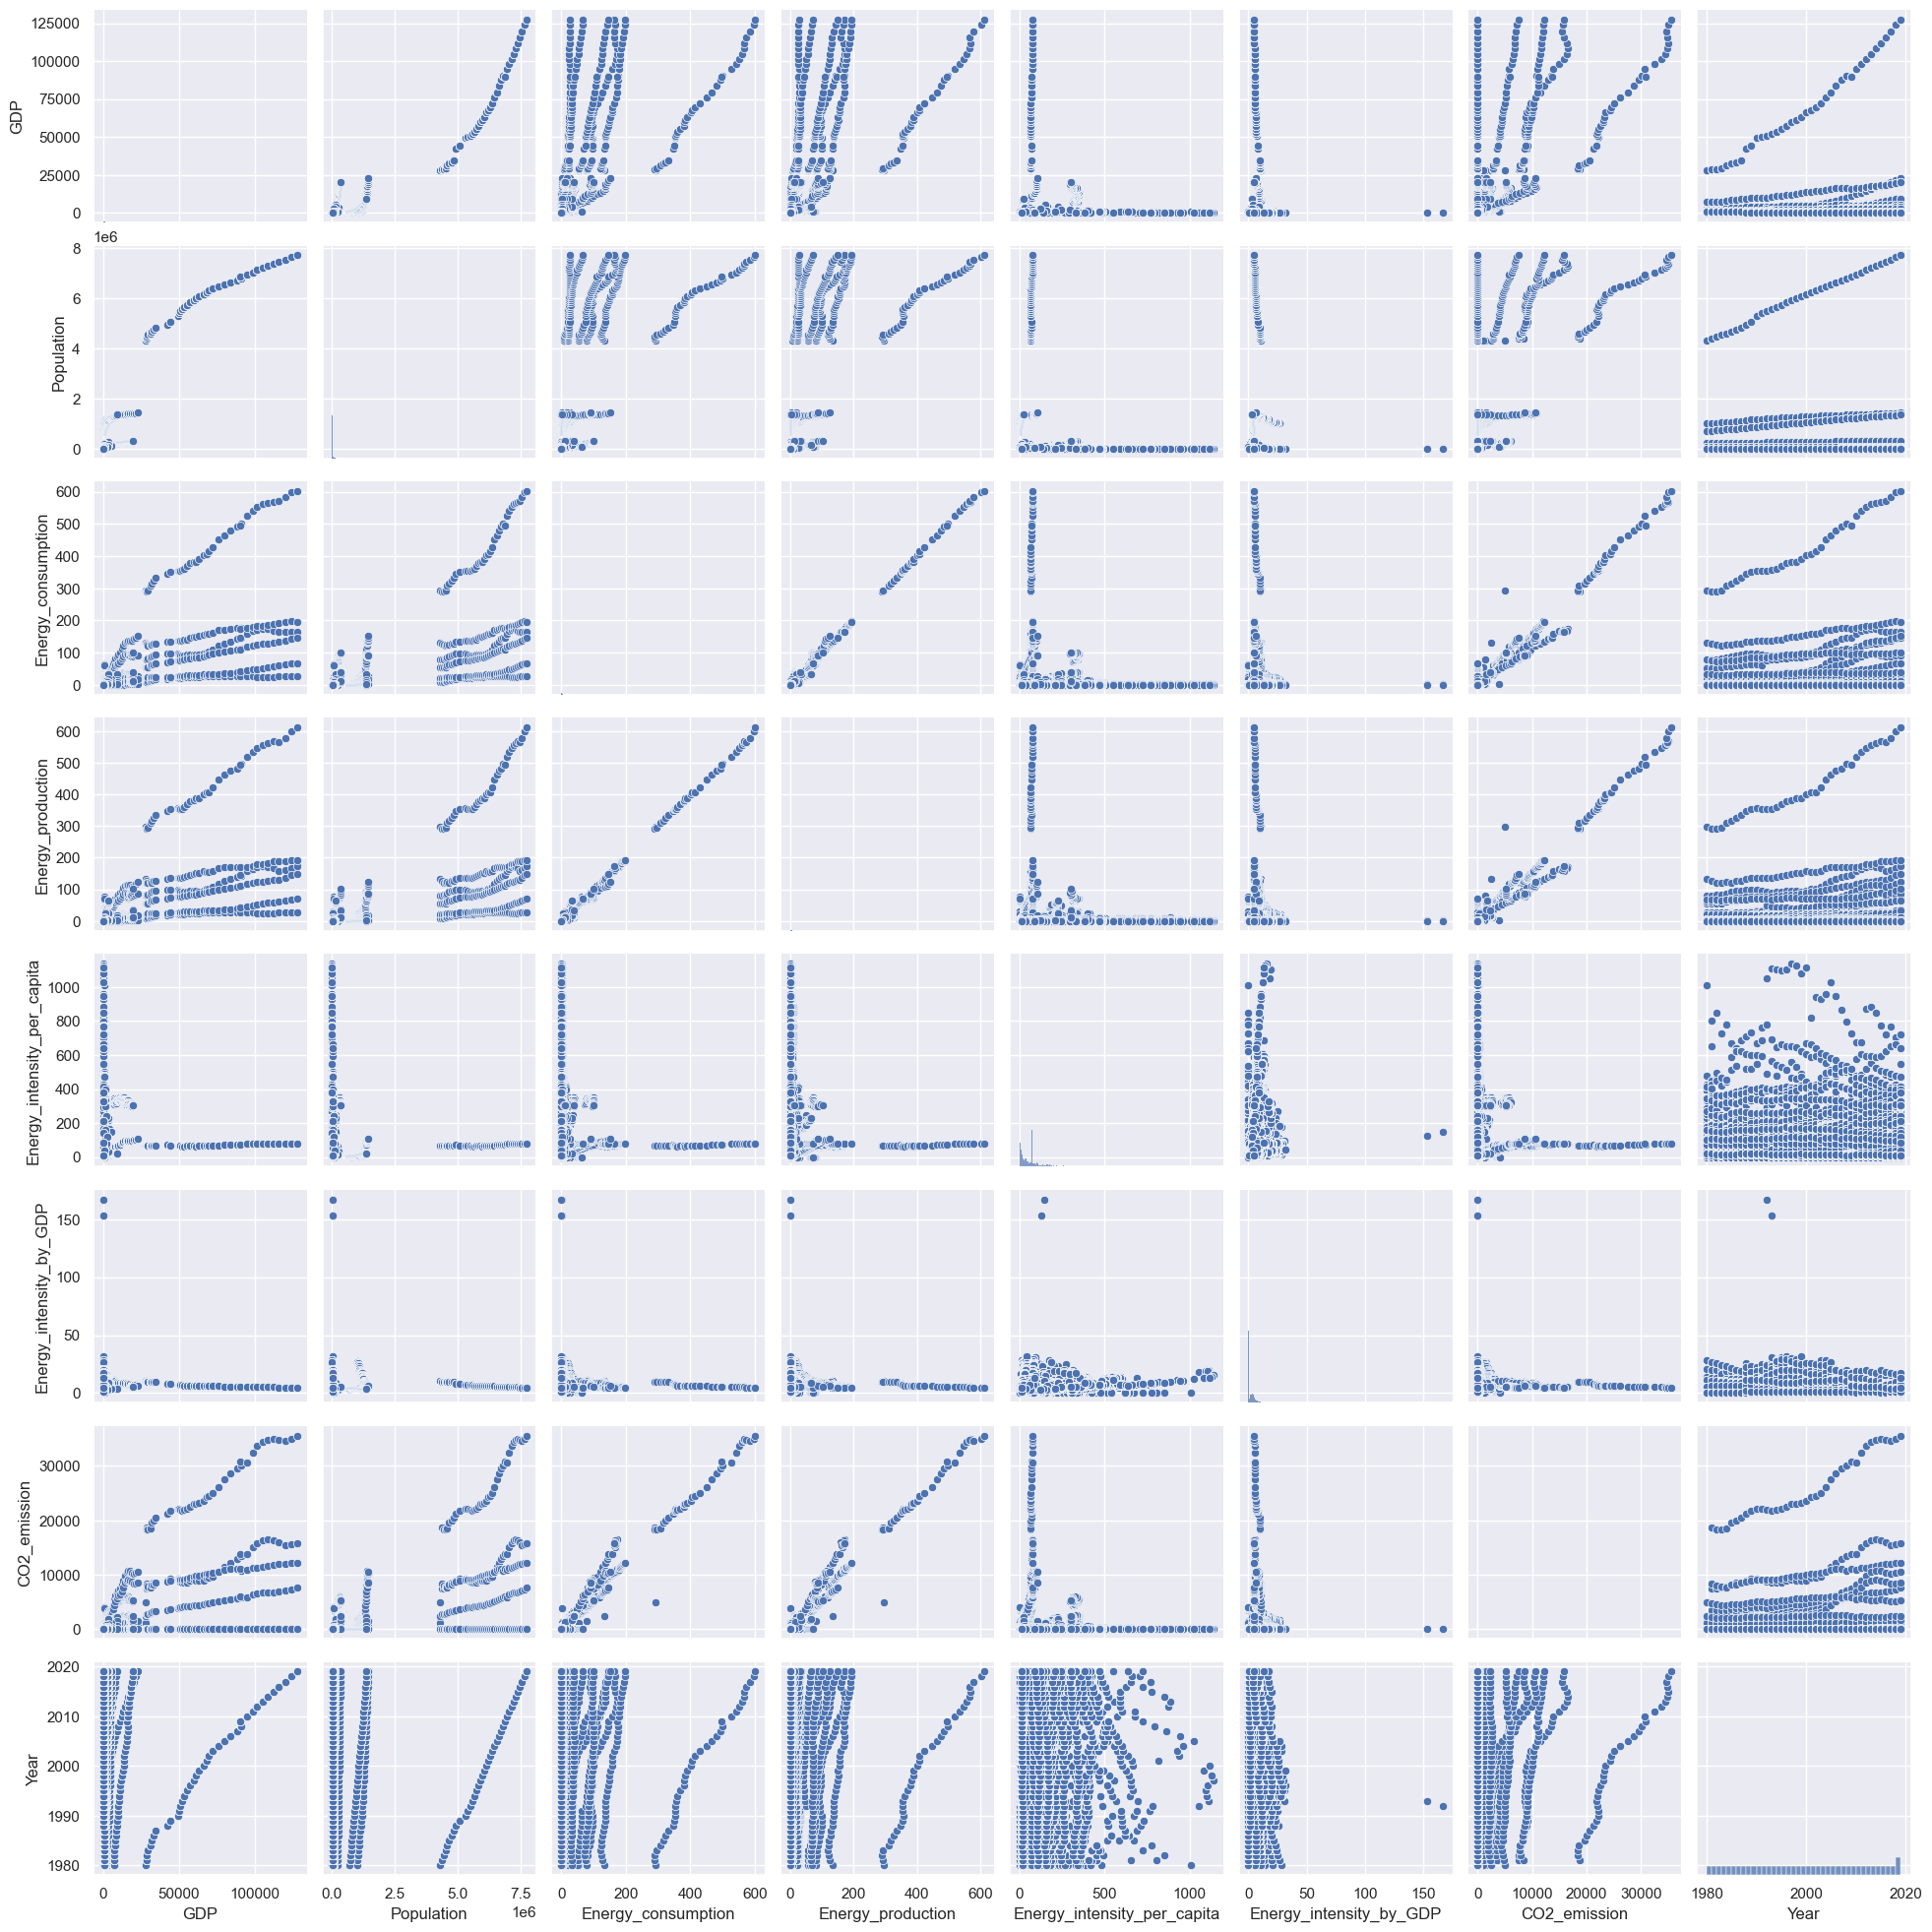

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('C:/Users/PC/Desktop/Documents/energy.csv')
# Imputar los valores faltantes con la media
data.fillna(data.mean(), inplace=True)

# Seleccionar las variables independientes y dependientes
X = data[['GDP', 'Population', 'Energy_consumption', 'Energy_production', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission', 'Year']].values
y = data[['Energy_consumption']].values

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal para Energy_production
reg1 = LinearRegression().fit(X_train, y_train)

# Ajustar el modelo de regresión lineal para CO2_emission
reg2 = LinearRegression().fit(X_train, y_train)
# Hacer predicciones para Energy_production
y_pred = reg1.predict(X_test)

# Hacer predicciones para CO2_emission
y_pred = reg2.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error

# Evaluar el rendimiento del modelo para Energy_production
print("R2 score para Energy_production:", r2_score(y_test, y_pred))
print("MSE para Energy_production:", mean_squared_error(y_test, y_pred))

# Evaluar el rendimiento del modelo para CO2_emission
print("R2 score para CO2_emission:", r2_score(y_test, y_pred))
print("MSE para CO2_emission:", mean_squared_error(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos las variables de interés
data_corr = data[['GDP', 'Population', 'Energy_consumption', 'Energy_production', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission', 'Year']]

# Graficamos las correlaciones
sns.pairplot(data_corr)
plt.show()

c:\Users\PC\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


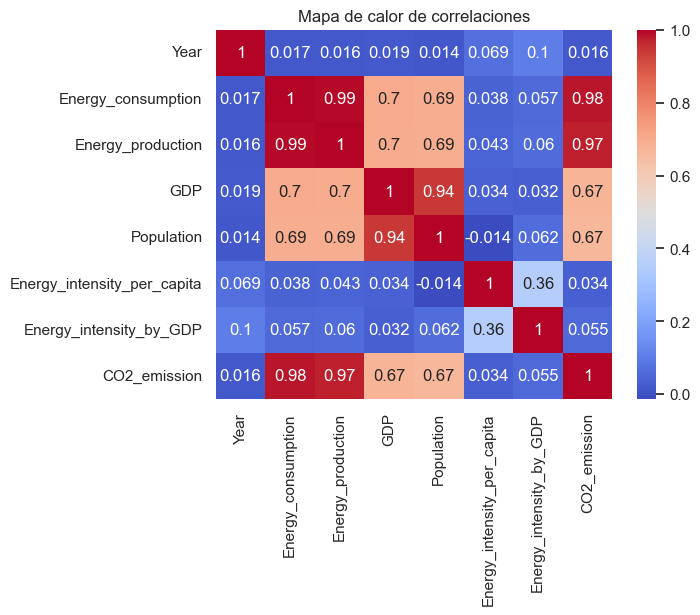

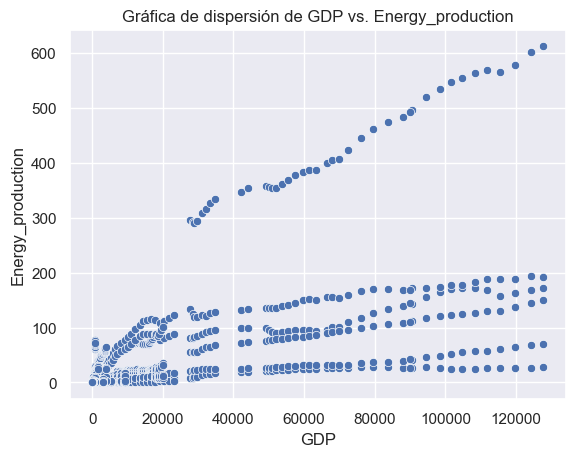

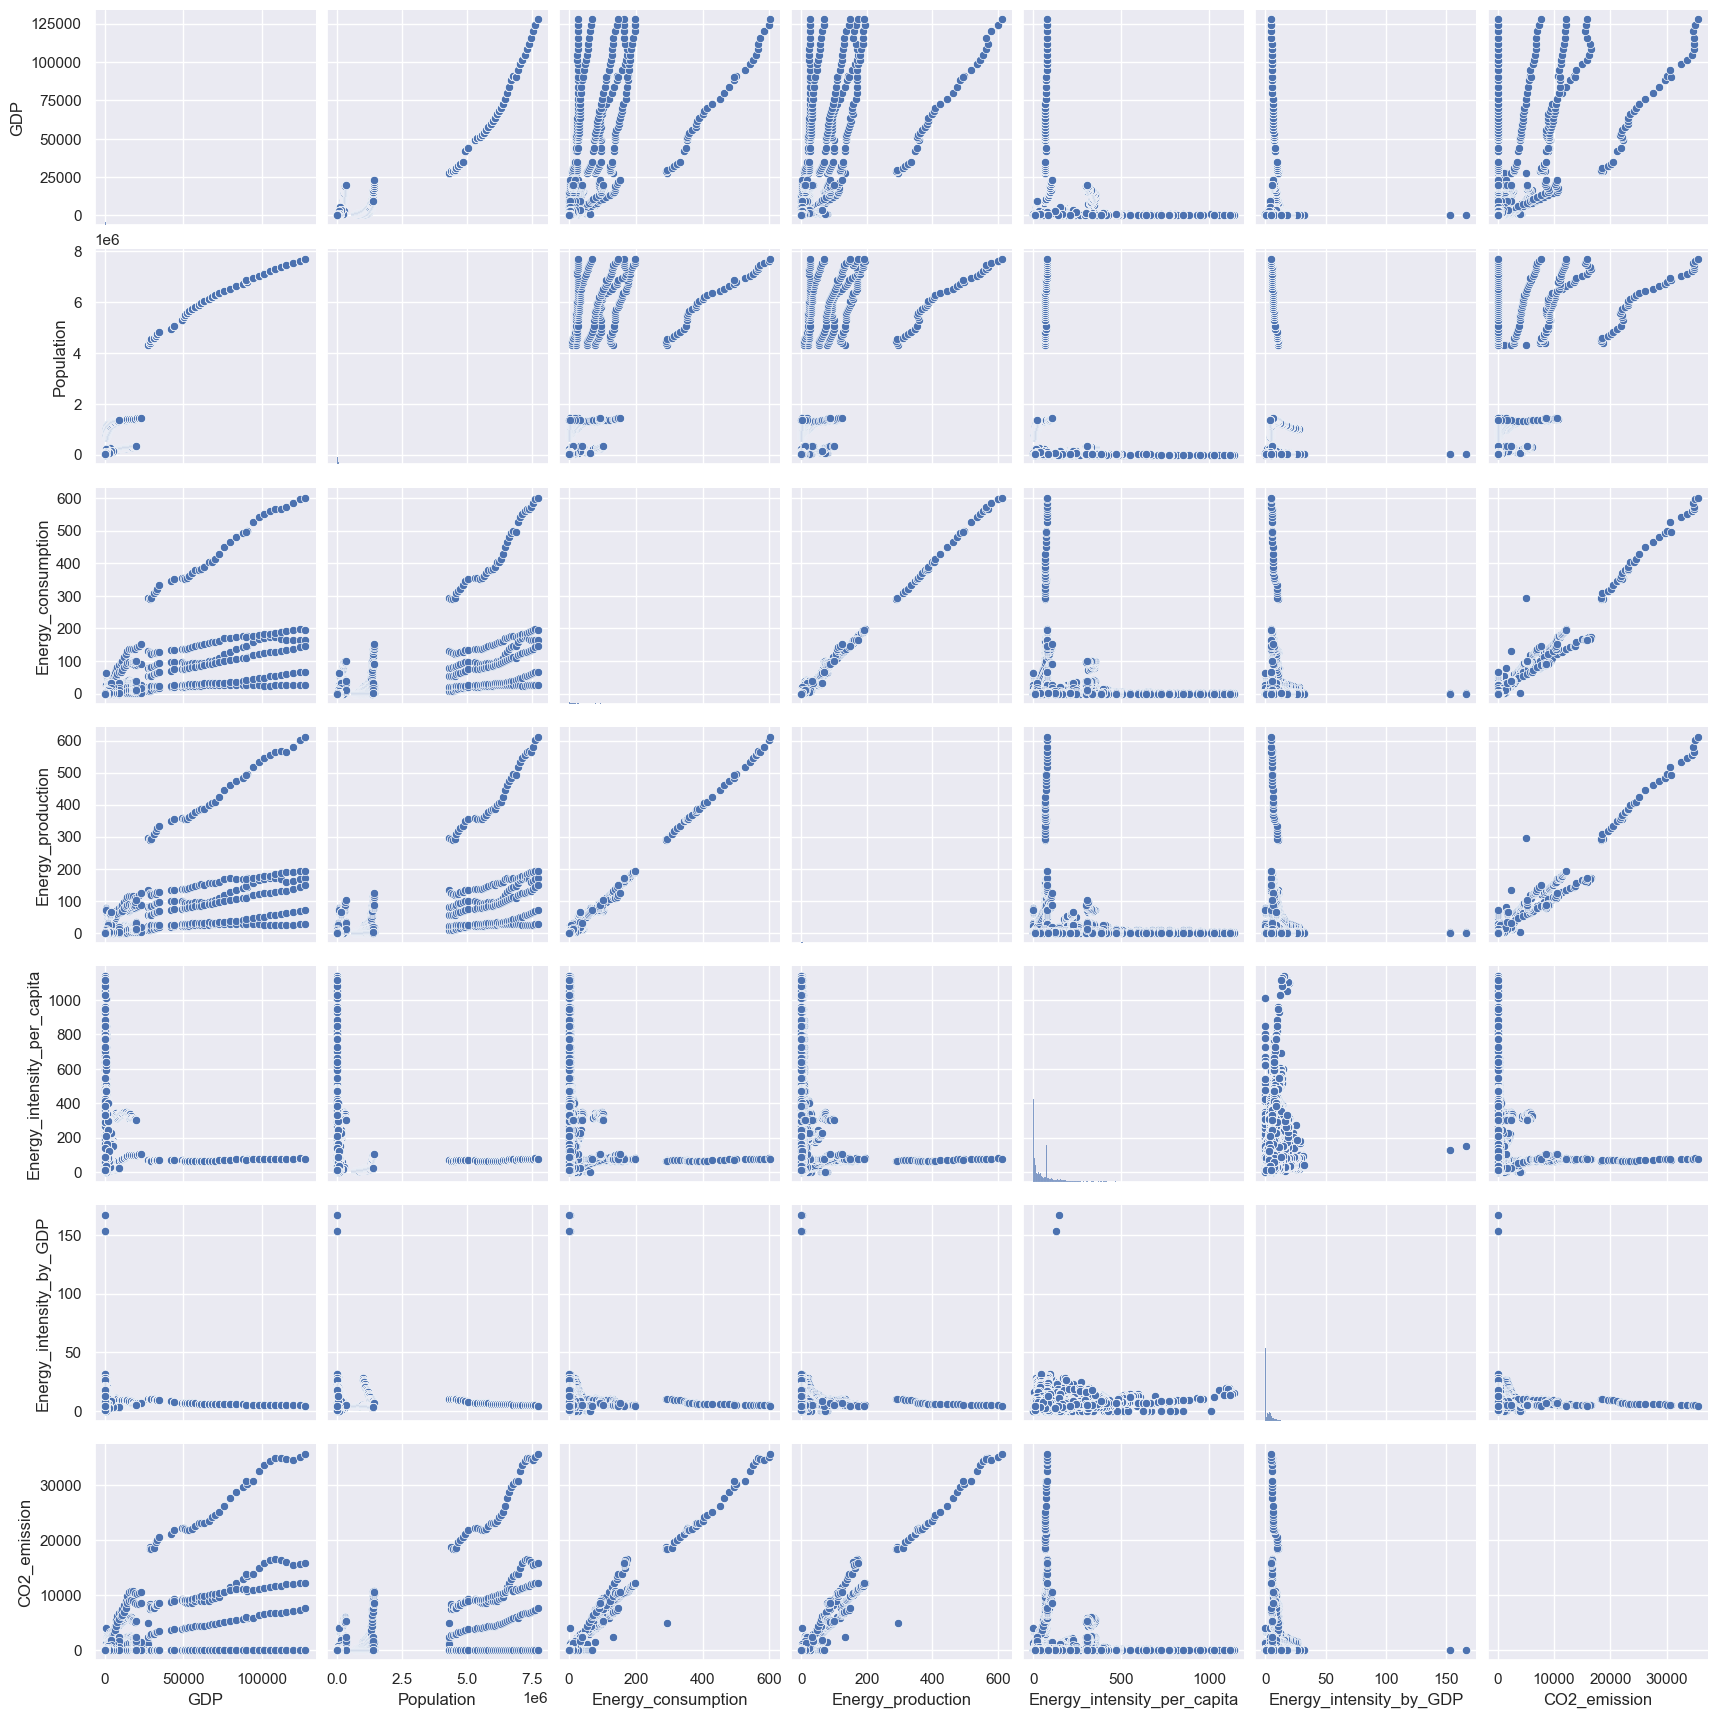

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
# Imputar los valores faltantes con la media
data.fillna(data.mean(), inplace=True)
# Gráfica de mapa de calor
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Mapa de calor de correlaciones')
plt.show()

# Gráfica de dispersión
sns.scatterplot(x='GDP', y='Energy_production', data=data)
plt.title('Gráfica de dispersión de GDP vs. Energy_production')
plt.show()

# Gráficas de correlación
data_corr = data[['GDP', 'Population', 'Energy_consumption', 'Energy_production', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission']]
sns.pairplot(data_corr)
plt.show()


Para el mapa de calor, se puede observar que existe una fuerte correlación positiva entre la producción de energía y el PIB de un país, así como también una correlación positiva moderada entre la producción de energía y la intensidad energética por PIB. Por otro lado, se puede ver una correlación positiva débil entre la producción de energía y la intensidad energética por habitante.

En el gráfico de dispersión, se puede observar una relación lineal positiva entre el PIB y la producción de energía. A medida que el PIB aumenta, también lo hace la producción de energía.

En las gráficas de correlación, se puede observar la relación entre las diferentes variables del conjunto de datos. Se puede ver una correlación positiva fuerte entre el PIB y la producción de energía, una correlación positiva moderada entre la producción de energía y la intensidad energética por PIB, y una correlación positiva débil entre la producción de energía y la intensidad energética por habitante. Estas relaciones son consistentes con lo observado en el mapa de calor y el gráfico de dispersión.

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso



# Tratar los valores faltantes
data = data.fillna(data.mean())

# Seleccionar columnas numéricas
numeric_columns = ['Year', 'Energy_consumption', 'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission']
X = data[numeric_columns]
y = data[numeric_columns[1:]] # Predicción de varios objetivos

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear pipeline con StandardScaler y LinearRegression
model = make_pipeline(StandardScaler(), LinearRegression())

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones con el modelo entrenado
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluar la precisión del modelo
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('Precisión R2 en conjunto de entrenamiento:', r2_train)
print('Precisión R2 en conjunto de prueba:', r2_test)
print('MSE en conjunto de entrenamiento:', mse_train)
print('MSE en conjunto de prueba:', mse_test)

# Entrenar modelos de regresión lineal Ridge y Lasso
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Realizar predicciones con los modelos entrenados
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# Evaluar la precisión de los modelos
print('Precisión de regresión lineal: ', model.score(X_test, y_test))
print('Precisión de regresión Ridge: ', ridge.score(X_test, y_test))
print('Precisión de regresión Lasso: ', lasso.score(X_test, y_test))


c:\Users\PC\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]


Precisión R2 en conjunto de entrenamiento: 1.0
Precisión R2 en conjunto de prueba: 1.0
MSE en conjunto de entrenamiento: 7.02881341660605e-21
MSE en conjunto de prueba: 7.461134253001028e-21
Precisión de regresión lineal:  1.0
Precisión de regresión Ridge:  0.9999999999999947
Precisión de regresión Lasso:  0.9999936658000516


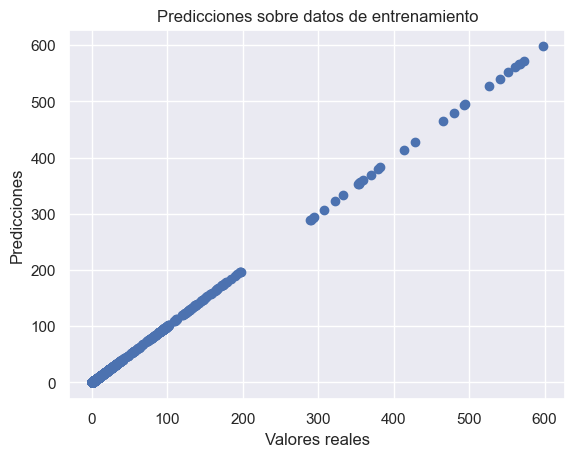

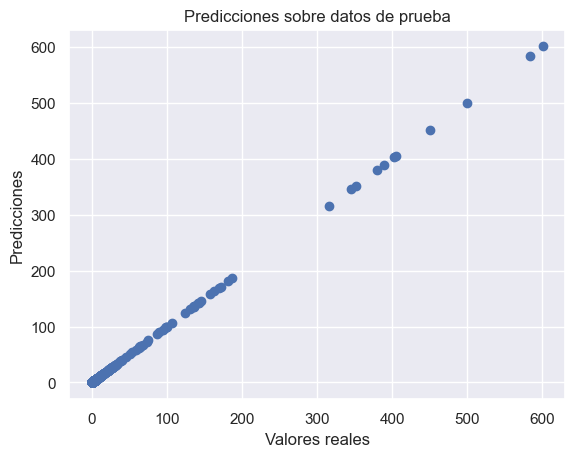

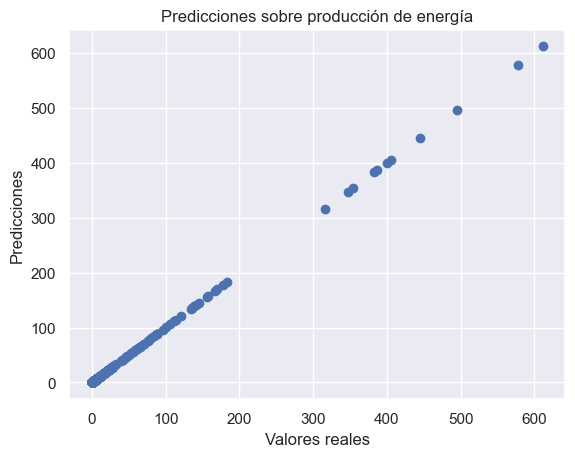

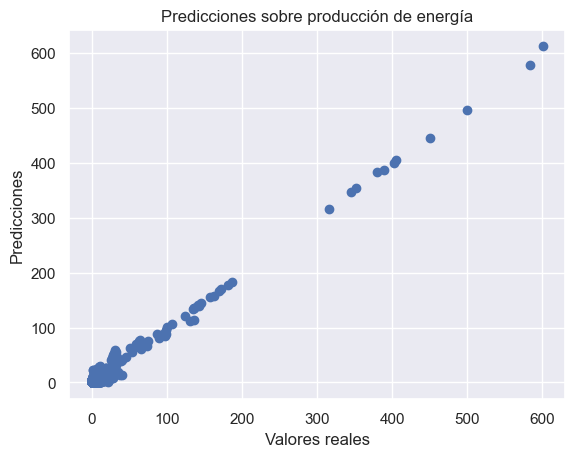

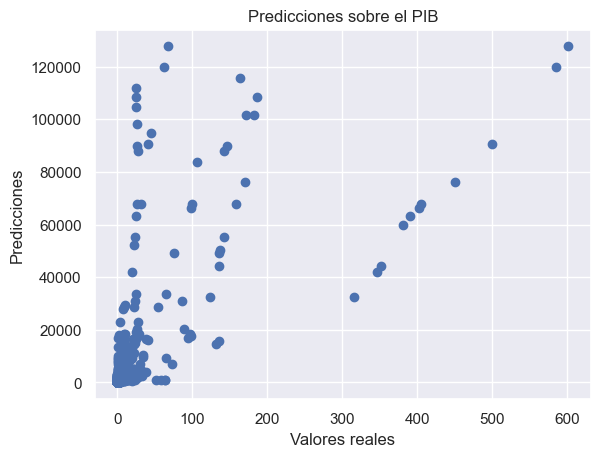

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Seleccionar las columnas numéricas
numeric_cols = ['Year', 'Energy_consumption', 'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission']
X = data[numeric_cols].values
y = data['Energy_consumption'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reemplazar los valores faltantes con la media de la columna
mean_values = np.nanmean(X_train, axis=0)
ind = np.where(np.isnan(X_train))
X_train[ind] = np.take(mean_values, ind[1])

mean_values = np.nanmean(X_test, axis=0)
ind = np.where(np.isnan(X_test))
X_test[ind] = np.take(mean_values, ind[1])

# Crear el modelo de regresión lineal con StandardScaler
model = make_pipeline(StandardScaler(), LinearRegression())

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones con el modelo entrenado
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Visualizar los resultados de entrenamiento
plt.scatter(y_train, y_pred_train)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones sobre datos de entrenamiento')
plt.show()

# Visualizar los resultados de prueba
plt.scatter(y_test, y_pred_test)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones sobre datos de prueba')
plt.show()

# Crear nuevos targets
y_2 = data['Energy_production'].values
y_3 = data['GDP'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
y_2_train, y_2_test = train_test_split(y_2, test_size=0.2, random_state=42)
y_3_train, y_3_test = train_test_split(y_3, test_size=0.2, random_state=42)

# Entrenar y realizar predicciones con los nuevos targets
model.fit(X_train, y_2_train)
y_pred_2 = model.predict(X_test)

model.fit(X_train, y_3_train)
y_pred_3 = model.predict(X_test)

# Visualizar los resultados para los nuevos targets
plt.scatter(y_2_test, y_pred_2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones sobre producción de energía')
plt.show()

#Visualizar los resultados para los nuevos targets
plt.scatter(y_test, y_pred_2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones sobre producción de energía')
plt.show()

plt.scatter(y_test, y_pred_3)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones sobre el PIB')
plt.show()
